In [ ]:
from astropy.io import fits
import numpy as np
from os.path import join
h=6.626e-27
hev=4.135667696e-15 #(eV/Hz)
kb=1.3807e-16
eV=1.602e-12
c=2.99792458e10
#E/hev=nu
def bbev(E,T):
    return 2*h*(E/hev)**3./c**2/(np.exp(h*(E/hev)/(kb*T)) - 1.)/h

density=21
logxi=1
datype="n{}_logxi_{}".format(density,logxi)
rpath="/disk/bifrost/yuanze/xillver_res/xillver3.5_modified/"+datype
rpath2="/disk/bifrost/yuanze/xillver_res/xillver3.5_modified_atdb12/"+datype
rpath3="/disk/bifrost/yuanze/xillver_res/xillver3.5_modified_withrad/"+datype
rpath4="/disk/bifrost/yuanze/xillver_res/xillver3.5_nosti/"+datype
rpath5="/disk/bifrost/yuanze/xillver_res/ktbb1/"+datype+"_bin5000"
version=""
bN=5000
skip=(bN+2)*14
specEH1=np.loadtxt(join(rpath+version,"current/spectr"),usecols=0,max_rows=bN,skiprows=skip)
foutH1=np.loadtxt(join(rpath+version,"current/spectr"),usecols=1,max_rows=bN,skiprows=skip)
#uH1=np.loadtxt(join(rpath+version,"current/intensity"),max_rows=bN,skiprows=skip)
fionizH1=np.loadtxt(join(rpath+version,"current/spectr"),usecols=5,max_rows=bN,skiprows=skip)

bN=5000
skip=(bN+2)*14
#version="3.5"
#specEH2=np.loadtxt(join(rpath+version,"current/spectr"),usecols=0,max_rows=bN,skiprows=skip)
foutH2=np.loadtxt(join(rpath2,"current/spectr"),usecols=1,max_rows=bN,skiprows=skip)
#fionizH2=np.loadtxt(join(rpath+version,"current/spectr"),usecols=5,max_rows=bN,skiprows=skip)
specEH2=np.loadtxt(join(rpath2,"current/spectr"),usecols=0,max_rows=bN,skiprows=skip)
#foutH2=np.loadtxt(join(rpath2,"current/intensity"),usecols=9,max_rows=bN,skiprows=skip)
uH2=np.loadtxt(join(rpath2,"current/intensity"),max_rows=bN,skiprows=skip)
fionizH2=np.loadtxt(join(rpath2,"current/spectr"),usecols=5,max_rows=bN,skiprows=skip)

#specEH3=np.loadtxt(join(rpath3,"current/spectr"),usecols=0,max_rows=bN,skiprows=skip)
#foutH3=np.loadtxt(join(rpath3,"current/spectr"),usecols=1,max_rows=bN,skiprows=skip)
#fionizH3=np.loadtxt(join(rpath3,"current/spectr"),usecols=5,max_rows=bN,skiprows=skip)

#specEH4=np.loadtxt(join(rpath4,"current/spectr"),usecols=0,max_rows=bN,skiprows=skip)
#foutH4=np.loadtxt(join(rpath4,"current/spectr"),usecols=1,max_rows=bN,skiprows=skip)
#fionizH4=np.loadtxt(join(rpath4,"current/spectr"),usecols=5,max_rows=bN,skiprows=skip)
skip=(bN+2)*0
specEH5=np.loadtxt(join(rpath5,"current/spectr"),usecols=0,max_rows=bN,skiprows=skip)
foutH5=np.loadtxt(join(rpath5,"current/spectr"),usecols=1,max_rows=bN,skiprows=skip)
fionizH5=np.loadtxt(join(rpath5,"current/spectr"),usecols=5,max_rows=bN,skiprows=skip)
#rpath2="/disk/bifrost/yuanze/xillver_res/Hon"
#specE2=np.loadtxt(join(rpath2,"current/spectr"),usecols=0,max_rows=1002,skiprows=skip)
#fout2=np.loadtxt(join(rpath2,"current/spectr"),usecols=1,max_rows=1002,skiprows=skip)
#fioniz2=np.loadtxt(join(rpath2,"current/spectr"),usecols=5,max_rows=1002,skiprows=skip)


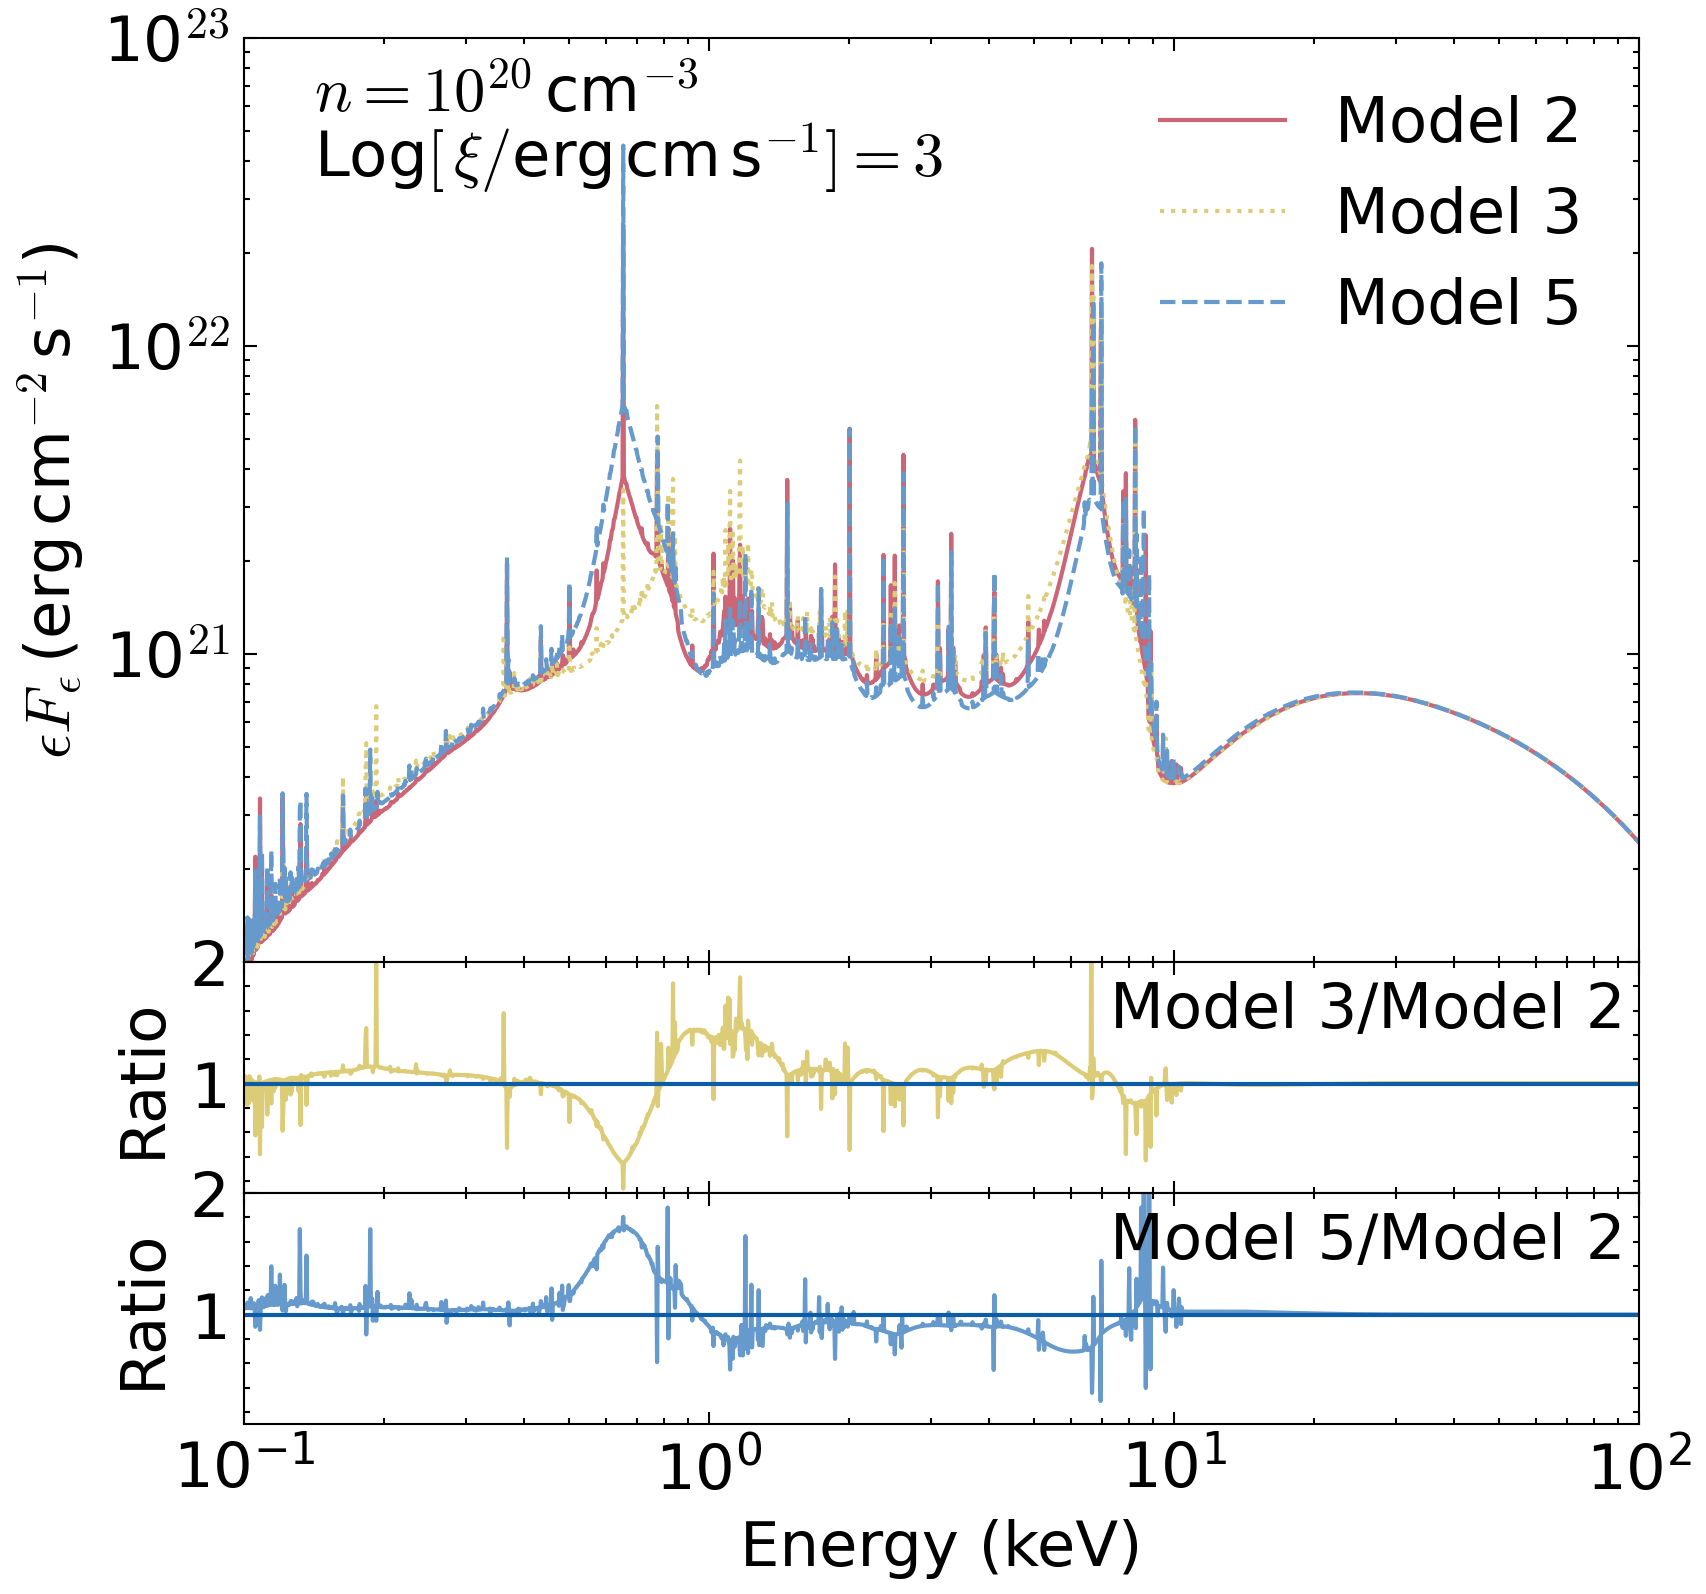

In [86]:
#Comparing Comptonization....
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(["science",'no-latex'])
plt.rcParams.update({
    "font.family": "dejavu sans",   # specify font family here
    "font.serif": ["Times"],  # specify font here
    "font.size":15,
"legend.fancybox":True})


fig = plt.figure(figsize=(6, 6), dpi=300)
gs = fig.add_gridspec(3, 1,height_ratios=[4,1,1],hspace=0.0)
axs=gs.subplots(sharex=True)

colors=["#CC6677","#DDCC77","#6699CC","#661100"]



#axs.plot(specEH5/1e3,specEH5*eV*foutH5,"C5-.",ms=0.5,label="Model 1")
axs[0].plot(specEH1/1e3,specEH1*eV*foutH1,color=colors[0],ms=1,label="Model 2")
#plt.plot(specEH1/1e3,fac*specEH1*eV*fionizH1,"C1--",ms=0.5)
axs[0].plot(specEH3/1e3,specEH3*eV*foutH3,":",color=colors[1],ms=0.5,label="Model 3")
#axs[0].plot(specEH4/1e3,specEH4*eV*foutH4,":",color=colors[2],ms=0.5,label="Model 4")
axs[0].plot(specEH2/1e3,specEH2*eV*foutH2,"--",color=colors[2],ms=0.5,label="Model 5")

axs[1].plot(specEH1/1e3,foutH3/foutH1,color=colors[1],ms=1,label="Model 3/Model 2")
#axs[2].plot(specEH1/1e3,foutH4/foutH1,color=colors[2],ms=1,label="Model 4/Model 2")
axs[2].plot(specEH1/1e3,foutH2/foutH1,color=colors[2],ms=1,label="Model 5/Model 2")
#plt.plot(x,y*x,"g")
#plt.plot(specEH3/1e3,fionizH3*specEH3/1e3,"m*",ms=0.5)
#plt.plot(specEH3/1e3,foutH3*specEH3/1e3,"m",ms=0.5,label="Xillver3.2 limit 1e-3")
#plt.plot(specE2/1e3,fout2*specE2/1e3,"ro",label="Xillver_3.4b",ms=0.5)
#plt.plot(specE2/1e3,fioniz2*specE2/1e3,"r-.",ms=0.5)
#pfac=1e25
#plt.plot(xvals,pfac*np.array(yvals),"g",label="pexrav")
#plt.plot(xorgvals,pfac*np.array(yorgvals),"g--")
axs[0].legend(loc="upper right")

axs[0].set_xscale("log")
axs[0].set_yscale("log")
axs[-1].set_xlabel("Energy (keV)")
axs[0].set_ylabel(r"$\epsilon F_{\epsilon}\,$(erg$\,$cm$^{-2}\,$s$^{-1}$)")
axs[0].set_xlim([0.1,100])
axs[0].set_ylim([1e20,1e23])

sublabels=["Model 3/Model 2","Model 5/Model 2"]
#axs[1].set_yscale("log")
for ind,ax in enumerate(axs):
    if ind != 0:
        ax.set_ylim([0.1,2])
        ax.set_yticks([1,2])
        ax.set_yticklabels(["1","2"])
        ax.axhline(1)
        #ax.legend(loc="upper right")
        ax.text(0.99,0.92,sublabels[ind-1],transform=ax.transAxes,fontsize=15,verticalalignment='top',horizontalalignment='right')
        ax.set_ylabel("Ratio")

axs[0].set_yticks([1e21,1e22,1e23])
axs[0].set_yticklabels(["10$^{21}$","10$^{22}$","10$^{23}$"])
axs[0].text(0.05,0.92,r"$n=10^{%d}\,$cm$^{-3}$"%density,transform=axs[0].transAxes,fontsize=15)
axs[0].text(0.05,0.85,r"Log$[\,\xi/$erg$\,$cm$\,$s$^{-1}]=%d $"%logxi,transform=axs[0].transAxes,fontsize=15)
#axs[2].set_ylim([0.9,1.1])
#axs.text(0.05,0.9,datype,transform=axs.transAxes)
plt.savefig("./pub2/morecomparison.pdf",dpi=300)

In [244]:
#Debugging...

from astropy.io import fits
import numpy as np
from os.path import join
datype="n15_logxi_2_1000bin"
rpath="/disk/bifrost/yuanze/xillver-dev_newxstar"
skip=0
specE1=np.loadtxt(join(rpath,"current/fioniz_in1"),usecols=0,max_rows=1002,skiprows=skip)
#fout=np.loadtxt(join(rpath,"current/spectr"),usecols=1,max_rows=1002,skiprows=skip)
fioniz1=np.loadtxt(join(rpath,"current/fioniz_in1"),usecols=1,max_rows=1002,skiprows=skip)
specE2=np.loadtxt(join(rpath,"current/fioniz_in2"),usecols=0,max_rows=1002,skiprows=skip)
#fout=np.loadtxt(join(rpath,"current/spectr"),usecols=1,max_rows=1002,skiprows=skip)
fioniz2=np.loadtxt(join(rpath,"current/fioniz_in2"),usecols=1,max_rows=1002,skiprows=skip)

In [430]:

import sys
from xspec import *
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits as pyfits

# Clean the figure
plt.clf()

lw = 2   # Line widths throughout the plot
fsz = 16 # Font size throughout the plot

plt.rc('axes', labelsize=14)  # fontsize of the x any y labels

# Load local models
#AllModels.lmod("relxill")

# Energies
AllModels.setEnergies("0.1 1000. 100 log")

# Define the Model
m1 = Model("pexrav")
Xset.abund="grsa"
m1(1).values = "2.0"      # powerlaw   PhoIndex
m1(2).values = "100.0"      # pexrav   Ecut
m1(3).values = "-1 -0.01 -2 -2 10 10"      # pexrav   Rref
m1(7).values = "0.5735"   # pexrav cosIncl

Plot("eemodel")
xvals = Plot.x()
yvals = Plot.model()

m1(3).values = "0"
Plot("eemodel")
xorgvals = Plot.x()
yorgvals = Plot.model()



Models will now use energy array created from:
   0.1 - 1000   100 log bins


Model pexrav<1> Source No.: 1   Active/Off
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   pexrav     PhoIndex            2.00000      +/-  0.0          
   2    1   pexrav     foldE      keV      100.000      +/-  0.0          
   3    1   pexrav     rel_refl            0.0          +/-  0.0          
   4    1   pexrav     Redshift            0.0          frozen
   5    1   pexrav     abund               1.00000      frozen
   6    1   pexrav     Fe_abund            1.00000      frozen
   7    1   pexrav     cosIncl             0.450000     frozen
   8    1   pexrav     norm                1.00000      +/-  0.0          
________________________________________________________________________

 Solar Abundance Vector set to grsa:  Grevesse, N. & Sauval, A. J. Space Science Reviews 85, 161 (1998)


<Figure size 640x480 with 0 Axes>

In [308]:
from astropy.io import 
import matplotlib.pyplot as plt
import numpy as np
from os.path import join
datype="n15_logxi_3"
rpatho=join("/disk/bifrost/yuanze/xillver_res/ktbb1",datype+"_bin5000_t")
rpath=join("/disk/bifrost/yuanze/xillver_res/xillver3.5_modified_atdb12",datype+"_t")
bN=5000
skip=bN*0
specE1=np.loadtxt(join(rpath,"current/spectr"),usecols=0,max_rows=bN,skiprows=skip)
#specEE1=np.loadtxt(join(rpath,"current/fioniz_in1"),usecols=0,max_rows=bN,skiprows=skip)
foutE1=np.loadtxt(join(rpath,"current/spectr"),usecols=1,max_rows=bN,skiprows=skip)
fionizE1=np.loadtxt(join(rpath,"current/spectr"),usecols=5,max_rows=bN,skiprows=skip)
fionizE2=np.loadtxt(join(rpatho,"current/spectr"),usecols=5,max_rows=bN,skiprows=skip)
#fionizEE1=np.loadtxt(join(rpath,"current/fioniz_in1"),usecols=1,max_rows=bN,skiprows=skip)
fdown=np.loadtxt(join(rpath,"current/spectr"),usecols=4,max_rows=bN,skiprows=skip)
#plt.plot(specE1/1e3,fdown,"b",label="Xillver_3.5(2012)",ms=1,lw=0.5)
#plt.plot(specE1/1e3,foutE1,"r",label="Xillver_3.5(2012)",ms=1,lw=0.5)
#plt.yscale("log")
#plt.xscale("log")

#rpath2="/disk/bifrost/yuanze/xillver_res/Hon"
#specE2=np.loadtxt(join(rpath2,"current/spectr"),usecols=0,max_rows=1002,skiprows=skip)
#fout2=np.loadtxt(join(rpath2,"current/spectr"),usecols=1,max_rows=1002,skiprows=skip)
#fioniz2=np.loadtxt(join(rpath2,"current/spectr"),usecols=5,max_rows=1002,skiprows=skip)



In [ ]:
plt.plot()

In [375]:
inten=bbev(specE1,4000*eV/kb)/hev

finten=fionizE1
flux=0
fflux=0
for e in range(len(specE1)):
    if e == 0:
        flux=inten[e]*specE1[e]*eV
        fflux=finten[e]*specE1[e]*eV
    else:
        flux+=(inten[e]+inten[e-1])/2*(specE1[e]-specE1[e-1])*eV
        fflux+=(finten[e]+finten[e-1])/2*(specE1[e]-specE1[e-1])*eV
print("BB flux=%e"%(flux))
print("corresponding xi=%e"%(flux*4*np.pi/1e20))
print("ionizing flux=%e"%(fflux))
print("corresponding xi=%e"%(fflux*4*np.pi/1e20))

BB flux=1.341825e+14
corresponding xi=1.686187e-05
ionizing flux=8.291218e+21
corresponding xi=1.041905e+03


In [624]:
jnu=np.loadtxt(join(rpath,"current/fullspec"),max_rows=3800,skiprows=1)

In [6]:
from astropy.io import fits
import numpy as np
from os.path import join
datype="n20_logxi_3"
specnnum="6"
bN=5000
skip=(bN+2)*0
h=6.626e-27
hev=4.135667696e-15 #(eV/Hz)
kb=1.3807e-16
eV=1.602e-12

#with warnings.catch_warnings():    
#    warnings.filterwarnings('ignore', r'will not be counted towards `max_rows=')
ite=0
skip=(bN+2)*ite
#rpatho=join("/disk/bifrost/yuanze/xillver_res/ktbb1",datype+"_bin5000")
rpatho="/disk/bifrost/yuanze/xillver-dev"

specE1=np.loadtxt(join(rpatho,"current/spectr"),usecols=0,max_rows=bN,skiprows=skip)
foutE1=np.loadtxt(join(rpatho,"current/spectr"),usecols=1,max_rows=bN,skiprows=skip)
foutE1_190=np.loadtxt(join(rpatho,"current/spectr"),usecols=7,max_rows=bN,skiprows=skip)
foutE1_180=np.loadtxt(join(rpatho,"current/spectr"),usecols=8,max_rows=bN,skiprows=skip)
foutE1_160=np.loadtxt(join(rpatho,"current/spectr"),usecols=9,max_rows=bN,skiprows=skip)

fionizE1=np.loadtxt(join(rpatho,"current/spectr"),usecols=5,max_rows=bN,skiprows=skip)
depth1=np.loadtxt(join(rpatho,"current/temper"),usecols=0,max_rows=200,skiprows=0)
tempeV1=np.loadtxt(join(rpatho,"current/temper"),usecols=1,max_rows=200,skiprows=(200+2)*ite)
temp1=tempeV1*eV/kb

"""
fraction1=np.loadtxt(join(rpatho,"current/fractions"))
#fionizE11=np.loadtxt(join(rpatho,"prevfullspec"),usecols=2,max_rows=bN,skiprows=bN*0+1)

htcomp1=np.loadtxt(join(rpatho,"current/partht"),usecols=0)
clcomp1=np.loadtxt(join(rpatho,"current/partht"),usecols=1)
htfreef1=np.loadtxt(join(rpatho,"current/partht"),usecols=2)
clfreef1=np.loadtxt(join(rpatho,"current/partht"),usecols=3)
clrec1=np.loadtxt(join(rpatho,"current/partht"),usecols=4)
cllines1=np.loadtxt(join(rpatho,"current/partht"),usecols=4)
cooling1=np.loadtxt(join(rpatho,"current/cooling"))
heating1=np.loadtxt(join(rpatho,"current/heating"))
"""
ite=0
skip=(bN+2)*ite
#rpath=join("/disk/bifrost/yuanze/xillver_res/xillver3.5_modified",datype)
rpath="/disk/bifrost/yuanze/xillver-dev_newxstar_no82"
specE2=np.loadtxt(join(rpath,"current/spectr"),usecols=0,max_rows=bN,skiprows=skip)
foutE2=np.loadtxt(join(rpath,"current/spectr"),usecols=1,max_rows=bN,skiprows=skip)
foutE2_190=np.loadtxt(join(rpath,"current/spectr"),usecols=7,max_rows=bN,skiprows=skip)
foutE2_180=np.loadtxt(join(rpath,"current/spectr"),usecols=8,max_rows=bN,skiprows=skip)
foutE2_160=np.loadtxt(join(rpath,"current/spectr"),usecols=9,max_rows=bN,skiprows=skip)

fionizE2=np.loadtxt(join(rpath,"current/spectr"),usecols=5,max_rows=bN,skiprows=skip)
depth2=np.loadtxt(join(rpath,"current/temper"),usecols=0,max_rows=200,skiprows=(200+2)*ite)
#tempeV2=np.loadtxt(join(rpath,"current/temper"),usecols=1,max_rows=200,skiprows=(200+2)*ite)
tempeV2=np.loadtxt(join(rpath,"prevtemper"),usecols=1,max_rows=200,skiprows=(200+2)*ite)
temp2=tempeV2*eV/kb
"""
fraction2=np.loadtxt(join(rpath,"current/fractions"))

htcomp2=np.loadtxt(join(rpath,"current/partht"),usecols=0)
clcomp2=np.loadtxt(join(rpath,"current/partht"),usecols=1)
htfreef2=np.loadtxt(join(rpath,"current/partht"),usecols=2)
clfreef2=np.loadtxt(join(rpath,"current/partht"),usecols=3)
cooling2=np.loadtxt(join(rpath,"current/cooling"))
heating2=np.loadtxt(join(rpath,"current/heating"))
"""
ite=0
skip=(bN+2)*ite
#rpatho2=join("/disk/bifrost/yuanze/xillver_res/xillver3.5_modified_atdb12",datype)
#rpatho2=join("/disk/bifrost/yuanze/xillver_res/xillver3.5_nosti",datype)
#rpatho2=join("/disk/bifrost/yuanze/xillver_res/xillver3.5_modified_withrad",datype)
rpatho2="/disk/bifrost/yuanze/xillver-dev_newxstar_modified"
specE3=np.loadtxt(join(rpatho2,"current/spectr"),usecols=0,max_rows=bN,skiprows=skip)
foutE3=np.loadtxt(join(rpatho2,"current/spectr"),usecols=1,max_rows=bN,skiprows=skip)
foutE3_190=np.loadtxt(join(rpatho2,"current/spectr"),usecols=7,max_rows=bN,skiprows=skip)
foutE3_180=np.loadtxt(join(rpatho2,"current/spectr"),usecols=8,max_rows=bN,skiprows=skip)
foutE3_160=np.loadtxt(join(rpatho2,"current/spectr"),usecols=9,max_rows=bN,skiprows=skip)
fionizE3=np.loadtxt(join(rpatho2,"current/spectr"),usecols=5,max_rows=bN,skiprows=skip)
depth3=np.loadtxt(join(rpatho2,"current/temper"),usecols=0,max_rows=200,skiprows=(200+2)*ite)
tempeV3=np.loadtxt(join(rpatho2,"current/temper"),usecols=1,max_rows=200,skiprows=(200+2)*ite)
temp3=tempeV3*eV/kb
#with warnings.catch_warnings():
    #warnings.filterwarnings('ignore', r'will not be counted towards `max_rows=')

#fionizE22=np.loadtxt(join(rpath,"prevfullspec"),usecols=2,max_rows=bN,skiprows=bN*0+1)
#fionizE22in=np.loadtxt(join(rpath,"current/fioniz_in2"),usecols=1,max_rows=bN,skiprows=0)
#rpath82=join("/disk/bifrost/yuanze/xillver_res/ktbb1_no82",datype)
#specE3=np.loadtxt(join(rpath,"current/spectr_last"),usecols=0,max_rows=bN,skiprows=skip)
#foutE3=np.loadtxt(join(rpath,"current/spectr_last"),usecols=1,max_rows=bN,skiprows=skip)
#fionizE3=np.loadtxt(join(rpath,"current/spectr_last"),usecols=5,max_rows=bN,skiprows=skip)



rxinput=np.loadtxt("/disk/bifrost/yuanze/reflionx/reflionx_HD_nthcomp_v1_spec%s_output.dat"%specnnum).T
rxinput2=np.loadtxt("/disk/bifrost/yuanze/reflionx/reflionx_HD_nthcomp_v1_spec5_output.dat").T



#fspecE=np.loadtxt(join(rpath,"fullspec"),usecols=1,max_rows=500,skiprows=1)
#fIout=np.loadtxt(join(rpath,"fullspec"),usecols=2,max_rows=500,skiprows=1)

FileNotFoundError: /disk/bifrost/yuanze/xillver-dev/current/spectr not found.

In [222]:
layer=1
ite=14
print(np.shape(fraction2))
print(np.shape(fraction1))
#fraction=fraction2[ite*(3*200)+(layer-1)*3]


(200, 465)
(200, 465)


In [528]:
mp=1.67e-24
h=6.626e-27
hev=4.135667696e-15 #(eV/Hz)
kb=1.3807e-16
eV=1.602e-12
c=2.99792458e10
T=1e10
pc=3.086e18
d=274*1e6*pc
obsfelum=3e-13*4*np.pi*d**2
print(obsfelum)
Efe=6400 #eV
nufe=Efe/hev
widthfe=nufe/c*np.sqrt(2*kb*T/mp)
x0fe=h*(nufe-widthfe)/eV
x1fe=h*(nufe+widthfe)/eV
Ha=6563
Lya=1216

line=Lya
nu=c/(line*1e-8)
width=nu/c*np.sqrt(2*kb*T/mp)
x0=h*(nu-width)/eV
xx=h*nu/eV
x1=h*(nu+width)/eV
print(xx)
print(x0fe)
print(x1fe)

2.6954053611134445e+42
10.197085195253464
6126.095773199545
6675.180009379192


In [530]:
from scipy.integrate import simps
ind=(specE2>x0) & (specE2<x1)
ind2=(specE2>x0fe) & (specE2<x1fe)
Lyaf=simps(foutE2[ind],specE2[ind]*eV)
FeKaf=simps(foutE2[ind2],specE2[ind2]*eV)
print(specE2[ind])
print(FeKaf/Lyaf)


[ 9.78572647  9.81795516  9.85029     9.88273132  9.91527949  9.94793486
  9.98069777 10.01356859 10.04654766 10.07963535 10.11283201 10.146138
 10.17955369 10.21307942 10.24671557 10.2804625  10.31432058 10.34829016
 10.38237162 10.41656532 10.45087164 10.48529095 10.51982361 10.55447001
 10.58923051 10.62410549]
0.012570237089612834


In [527]:
indt=(specE1>25) & (specE1<50)
#indt=spec
print(foutE1[indt])

[ 3.8839918e+23  3.7860935e+23  3.7946557e+23  3.7026299e+23
  3.5405399e+23  3.5169775e+23  3.3978692e+23  4.2524912e+23
  3.7953359e+23  3.3338559e+23  3.0753079e+23  3.0247983e+23
  2.9580863e+23  2.8586157e+23  2.9420387e+23  2.7352129e+23
  2.7254870e+23  2.7222825e+23  2.7583786e+23  9.0931706e+24
  2.6837718e+23  2.4663979e+23  2.7366843e+23  2.2844946e+23
  2.2196541e+23  2.1648957e+23  3.1759462e+23  2.8118837e+23
  2.3824394e+23  1.9594424e+23  2.5803173e+23  1.9070529e+23
  2.4834485e+23  5.2227126e+23  1.7409343e+23  2.3020288e+23
  2.7167765e+23  1.7062152e+23  3.0063444e+24  8.2413288e+23
  3.3638364e+23  1.5065091e+23  1.8680127e+24  2.2290889e+23
  1.4189127e+23  1.3052093e+23  1.2659584e+23  1.2333756e+23
  1.1980151e+23  1.1699489e+23  1.3682208e+23  1.1181846e+23
  1.2332835e+23  1.4205195e+23  1.0117923e+23  1.0104470e+23
  9.6064589e+22  1.1263042e+23  9.4263518e+22  9.0785397e+22
  9.1085496e+22  8.6987357e+22  2.7720584e+23  8.1238152e+23
  3.8377512e+23  2.32592

/tmp/ipykernel_3287167/4265360106.py:6: RuntimeWarning: divide by zero encountered in divide
  plt.plot(specE2,foutE2/foutE3)
/tmp/ipykernel_3287167/4265360106.py:6: RuntimeWarning: invalid value encountered in divide
  plt.plot(specE2,foutE2/foutE3)


Text(0, 0.5, 'ite1000/ite200')

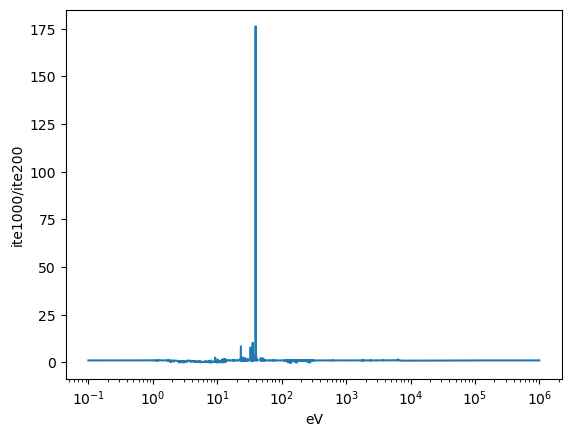

In [7]:
import matplotlib.pyplot as plt
ind2=foutE2<0
ind3=foutE3<0
foutE2[ind2]=0
foutE3[ind3]=0
plt.plot(specE2,foutE2/foutE3)
plt.xscale('log')
plt.xlabel('eV')
plt.ylabel('ite1000/ite200')

/tmp/ipykernel_2479280/1786853704.py:19: UserWarning: Input line 505202 contained no data and will not be counted towards `max_rows=3500`.  This differs from the behaviour in NumPy <=1.22 which counted lines rather than rows.  If desired, the previous behaviour can be achieved by using `itertools.islice`.
Please see the 1.23 release notes for an example on how to do this.  If you wish to ignore this warning, use `warnings.filterwarnings`.  This warning is expected to be removed in the future and is given only once per `loadtxt` call.
  jnuN=np.loadtxt(join(rpath,"current/fullspec"),usecols=3,max_rows=bN-trunc,skiprows=skip+1+bN)


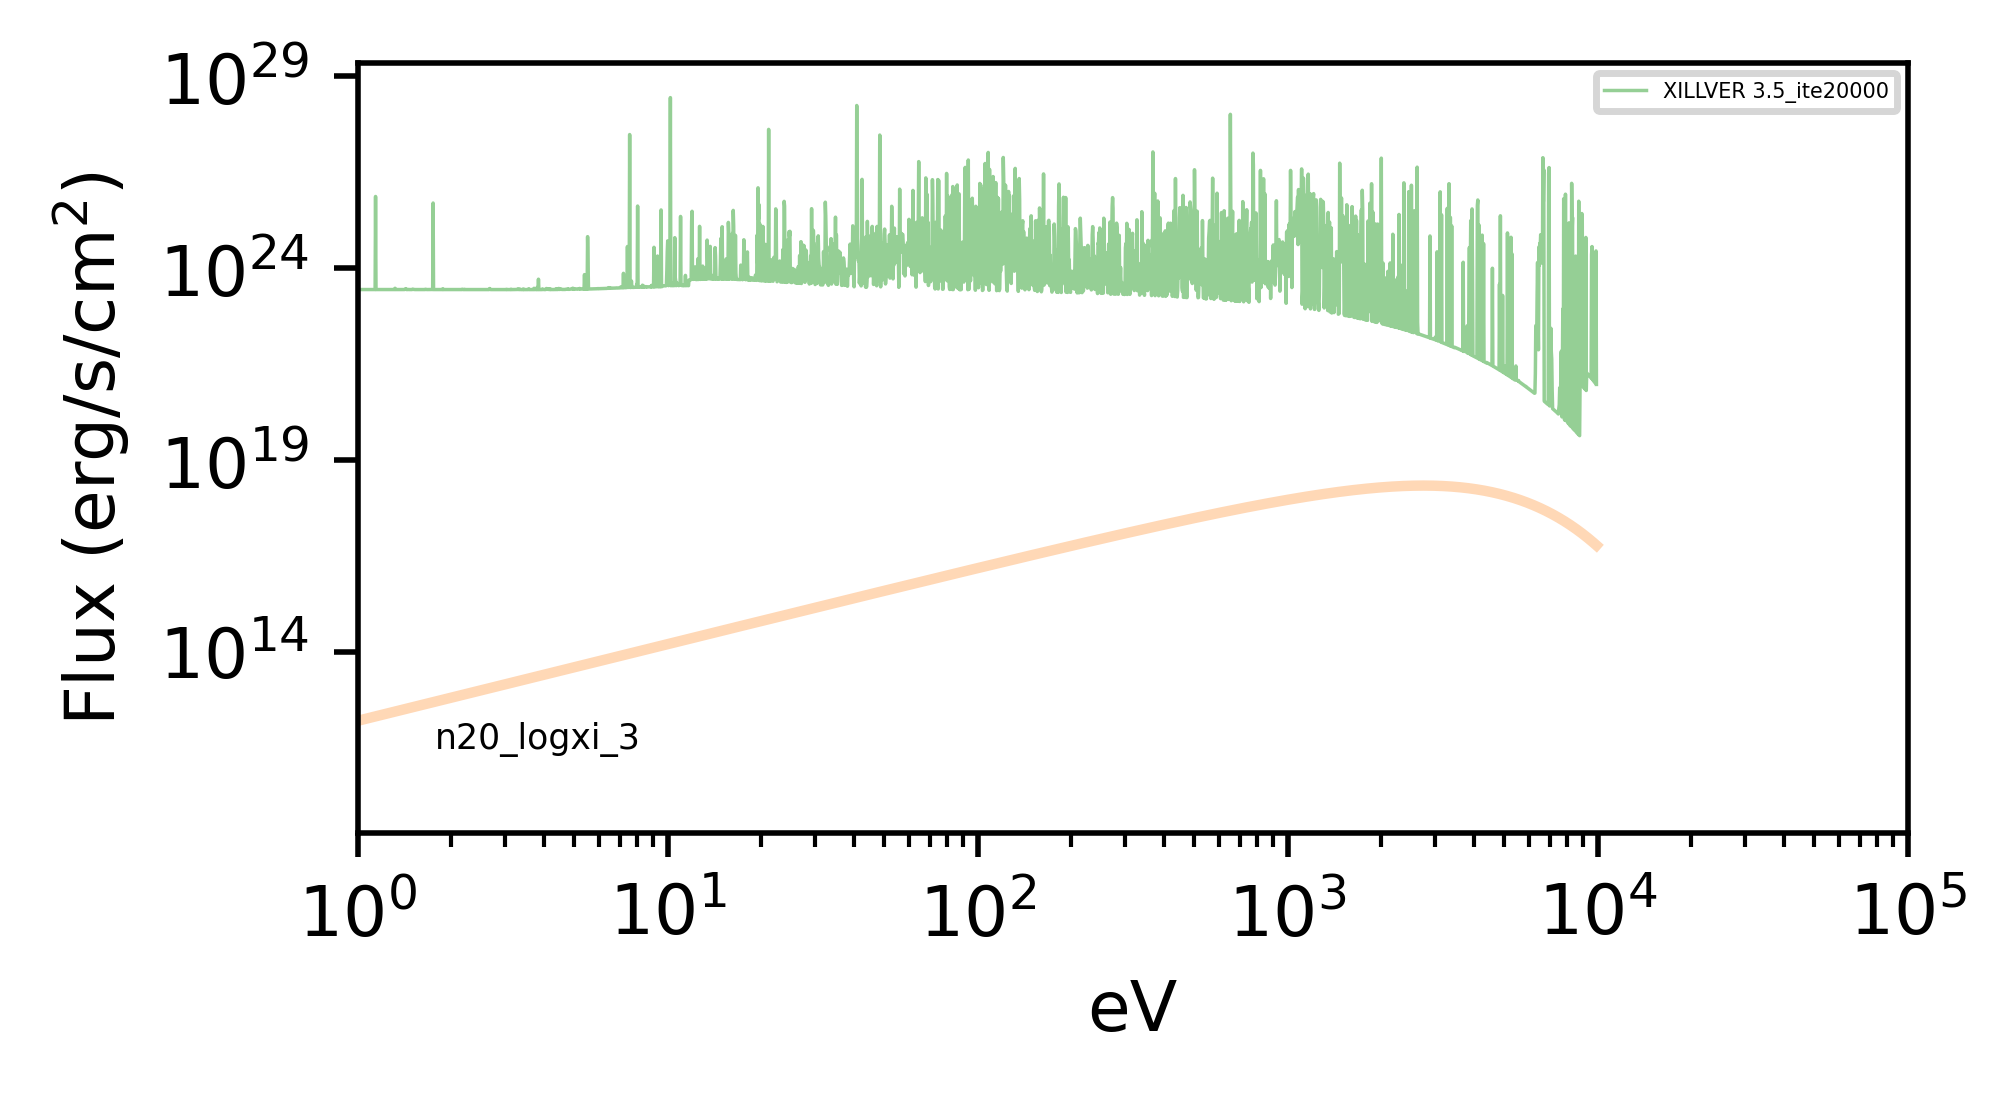

In [15]:
import matplotlib.pyplot as plt
from os.path import join
import numpy as np

datype="n20_logxi_3"
#rpath=join("/disk/bifrost/yuanze/xillver_res/xillver3.5/tbb1",datype)
rpath=join("/disk/bifrost/yuanze/xillver_res/xillver3.5_modified",datype)
bN=5000
trunc=1500
skip=(bN+2)*100


fig=plt.figure(figsize=(4,2),dpi=500)
gs = fig.add_gridspec(1,1)
axs=gs.subplots()

#specE1=np.loadtxt(join(rpath,"current/fullspec"),usecols=0,max_rows=bN-trunc,skiprows=skip+1)
jnu=np.loadtxt(join(rpath,"current/fullspec"),usecols=3,max_rows=bN-trunc,skiprows=skip+1)
jnuN=np.loadtxt(join(rpath,"current/fullspec"),usecols=3,max_rows=bN-trunc,skiprows=skip+1+bN)
tempeV1=np.loadtxt(join(rpath,"current/temper"),usecols=1,max_rows=200,skiprows=(200+2)*14)
temp1=tempeV1*eV/kb

opa=np.loadtxt(join(rpath,"current/fullspec"),usecols=4,max_rows=bN-trunc,skiprows=skip+1)
spec=np.loadtxt(join(rpath,"current/fullspec"),usecols=1,max_rows=bN-trunc,skiprows=skip+1)
Earray=specE1*eV

layer=100
#axs.plot(specE1,foutE1*Earray,"C1",label=r"XILLVER 3.4b",ms=1,lw=0.5)
#axs.plot(specE1,fionizE1*Earray,"m",label=r"F$_{ionize}$",ms=1,lw=0.5,alpha=0.3)
axs.plot(spec,bbev(spec,temp1[layer])*Earray,color='C1',alpha=0.3)

axs.plot(spec,jnu,"C2",label=r"XILLVER 3.5_ite20000",ms=1,lw=0.5,alpha=0.5)
#axs.plot(specE2,bbev(specE2,temp2[layer])*Earray,color='C2',alpha=0.3)

#axs.plot(specE3,foutE3*Earray,"-C3",label=r"XILLVER 3.5_ite200",ms=1,lw=0.5,alpha=0.5)
#axs.plot(spec,jnu/opa*spec*eV,"C1-.",label=r"Source function$_{layer1}$",alpha=0.3)

#layermax=200
#cmap = matplotlib.cm.get_cmap('cividis')
#sm = plt.cm.ScalarMappable(cmap=cmap)
#colors=matplotlib.cm.cividis(np.arange(layermax)/layermax)
#axins0 = inset_axes(axs,
#                    width="60%",  # width = 50% of parent_bbox width
#                    height="5%",  # height : 5%
#                    loc='lower left',
#                    bbox_to_anchor=(0.2,0.13,1,1),
#                    bbox_transform=axs.transAxes)


layer=0
#axs.plot(specE1,bbev(specE1,temp1[layer]),color='b',alpha=0.3)
#cbar=plt.colorbar(sm, ticks=np.linspace(0,1,3),orientation="horizontal",cax=axins0)
#cbar.set_label(label="Layers", labelpad=-1)
#cbar.ax.set_xticklabels(['0','{}'.format(layermax/2),layermax])
axs.text(0.05, 0.1,"{}".format(datype),transform=axs.transAxes,verticalalignment='bottom',horizontalalignment='left',fontsize=5)
axs.set_xlim([1,1e5])
#axs.set_ylim([1e14,1e25])
axs.legend(fontsize=3)
#axs.axvline(x=xx,lw=0.5,alpha=0.2)
#axs.axvline(x=x0,lw=0.1,color='r',alpha=0.2)
#axs.axvline(x=x1,lw=0.1,color='r',alpha=0.2)

#axs.axvline(x=x0fe,lw=0.1,color='r',alpha=0.2)
#axs.axvline(x=x1fe,lw=0.1,color='r',alpha=0.2)
axs.set_ylabel(r"Flux (erg/s/cm$^2$)")
axs.set_xlabel("eV")
axs.set_yscale("log")
axs.set_xscale("log")


In [12]:
print(specE1)

[0.03255089 0.03255089 0.03255089 ... 0.03255089 0.03255089 0.03255089]


In [116]:
#Reading heating and cooling rates
import bisect
import matplotlib.pyplot as plt


feselected=[ 'Fe_%d'%n for n in range(1,26)]

elements=['H','He','Li','Be','B','C','N','O','F','Ne','Na','Mg','Al','Si','P','S','Cl','Ar','K','Ca','Sc','Ti','V','Cr','Mn','Fe','Co','Ni','Cu','Zn']
noa=[n*(n+1)/2 for n in range(1,31)]
linetab=[]

heat=[]
heato=[]
heatosum=[]
cool=[]
coolo=[]
linedic={}
linedicosum={}
linedico={}
linec={}
lineco={}
for layer in range(1,201):

    heatingo=heating1[layer-1]
    heating=heating2[layer-1]
    coolingo=cooling1[layer-1]
    cooling=cooling2[layer-1]
    for ind in range(len(heating)):
        k=bisect.bisect_left(noa,ind+1)
        #print("k",k)
        #print("ind",ind)
        #print(noa[k])
        #print(k)
        if k == 0:
            if layer==1:
                linetab.append(elements[k]+"_%d"%(ind+1))
            #print(linetab[-1])
            #linedic[elements[k]+"_%d"%(ind+1)]=heating[ind]
            linedico[elements[k]+"_%d"%(ind+1)]=heatingo[ind]
        else:
            if layer==1:
                linetab.append(elements[k]+"_%d"%(ind+1-noa[k-1]))
            #linedic[elements[k]+"_%d"%(ind+1-noa[k-1])]=heating[ind]
            linedico[elements[k]+"_%d"%(ind+1-noa[k-1])]=heatingo[ind]
        if elements[k] in linedicosum.keys():
            linedicosum[elements[k]]+=np.float64(heatingo[ind])
            lineco[elements[k]]+=np.float64(coolingo[ind])
        else:
            linedicosum[elements[k]]=np.float64(heatingo[ind])
            lineco[elements[k]]=np.float64(coolingo[ind])
        
    for ind in range(len(elements)):
        linedic[elements[ind]]=heating[ind]
        linec[elements[ind]]=cooling[ind]
    heat.append(linedic.copy())
    heato.append(linedico.copy())
    heatosum.append(linedicosum.copy())
    cool.append(linec.copy())
    coolo.append(lineco.copy())

#for eind,e in enumerate(feselected):
#    axs[0].plot(depth1[layer-1],linedic[e],color="C%d"%eind)
#    axs[1].plot(depth2[layer-1],linedico[e],color="C%d"%eind)

#axs[0].set_yscale('log')
#axs[1].set_yscale('log')
#axs[1].set_xscale('log')
#axs[1].set_xlabel(r"$\epsilon F_{\epsilon}$")
#print(linetab[-1])
#gind=fraction>1e-15
#print(linetab[gind])
#print(fraction[gind])

In [ ]:
numrow=2
numcol=1

fig=plt.figure(figsize=(2*numrow,4*numcol),dpi=500)
gs = fig.add_gridspec(numrow,numcol, hspace=0)
axs=gs.subplots(sharex=True)
axdict1={}
axdict2={}
ms=0.5
sm = plt.cm.ScalarMappable(cmap=cmap)
colors=matplotlib.cm.cividis(np.arange(26)/26)

for layer in range(1,201):
    for eind,e in enumerate(feselected):
        #print(e)
        #print(spect[layer-1][e])
        if layer==200:
            axdict1[e]=axs[0].plot(depth1[layer-1],specto[layer-1][e],'o',color=colors[eind],ms=ms)
            axdict2[e]=axs[1].plot(depth2[layer-1],spect[layer-1][e],'o',color=colors[eind],ms=ms)
        else:
            axs[0].plot(depth1[layer-1],specto[layer-1][e],'o',color=colors[eind],ms=ms)
            axs[1].plot(depth2[layer-1],spect[layer-1][e],'o',color=colors[eind],ms=ms)
axins1 = inset_axes(axs[1],
                    width="60%",  # width = 50% of parent_bbox width
                    height="5%",  # height : 5%
                    loc='lower left',
                    bbox_to_anchor=(0.2,0.13,1,1),
                    bbox_transform=axs[1].transAxes)
cbar=plt.colorbar(sm, ticks=np.linspace(0,1,3),orientation="horizontal",cax=axins1)
cbar.set_label(label=r"e$^{-}$ lost", labelpad=-1)
cbar.ax.set_xticklabels(['0','13','25'])
axs[0].text(0.05, 0.1,"XILLVER3.4b",transform=axs[0].transAxes,verticalalignment='bottom',horizontalalignment='left',fontsize=5)
axs[1].text(0.05, 0.1,"XILLVER3.5",transform=axs[1].transAxes,verticalalignment='bottom',horizontalalignment='left',fontsize=5)
axs[0].set_ylim([1e-13,1])
axs[1].set_ylim([1e-13,1])
axs[0].set_xlim([1e-4,10])
axs[1].set_xlim([1e-4,10])
axs[0].set_yscale('log')
axs[1].set_yscale('log')
axs[1].set_xscale('log')
axs[1].set_xlabel(r"$\tau_{T}$")
#axs[1].legend([axdict1[e] for e in feselected],labels=feselected,fontsize=5)
#axs[1].legend([axdict1[e] for e in feselected],labels=feselected)
#fig.savefig("Ironstate.png")
#print(linetab[-1])
#gind=fraction>1e-15
#print(linetab[gind])
#print(fraction[gind])

In [87]:
import bisect
import matplotlib.pyplot as plt


feselected=[ 'Fe_%d'%n for n in range(1,26)]
oselected=['O_%d'%n for n in range(1,8)]
elements=['H','He','Li','Be','B','C','N','O','F','Ne','Na','Mg','Al','Si','P','S','Cl','Ar','K','Ca','Sc','Ti','V','Cr','Mn','Fe','Co','Ni','Cu','Zn']
noa=[n*(n+1)/2 for n in range(1,31)]
linetab=[]

spect=[]
specto=[]
linedic={}
linedico={}
for layer in range(1,201):

    fractiono=fraction1[layer-1]
    fraction=fraction2[layer-1]
    for ind in range(len(fraction)):
        k=bisect.bisect_left(noa,ind+1)
        #print("k",k)
        #print("ind",ind)
        #print(noa[k])
        #print(k)
        if k == 0:
            if layer==1:
                linetab.append(elements[k]+"_%d"%(ind+1))
            #print(linetab[-1])
            linedic[elements[k]+"_%d"%(ind+1)]=fraction[ind]
            linedico[elements[k]+"_%d"%(ind+1)]=fractiono[ind]
        else:
            if layer==1:
                linetab.append(elements[k]+"_%d"%(ind+1-noa[k-1]))
            linedic[elements[k]+"_%d"%(ind+1-noa[k-1])]=fraction[ind]
            linedico[elements[k]+"_%d"%(ind+1-noa[k-1])]=fractiono[ind]
    spect.append(linedic.copy())
    specto.append(linedico.copy())

#for eind,e in enumerate(feselected):
#    axs[0].plot(depth1[layer-1],linedic[e],color="C%d"%eind)
#    axs[1].plot(depth2[layer-1],linedico[e],color="C%d"%eind)

#axs[0].set_yscale('log')
#axs[1].set_yscale('log')
#axs[1].set_xscale('log')
#axs[1].set_xlabel(r"$\epsilon F_{\epsilon}$")
#print(linetab[-1])
#gind=fraction>1e-15
#print(linetab[gind])
#print(fraction[gind])

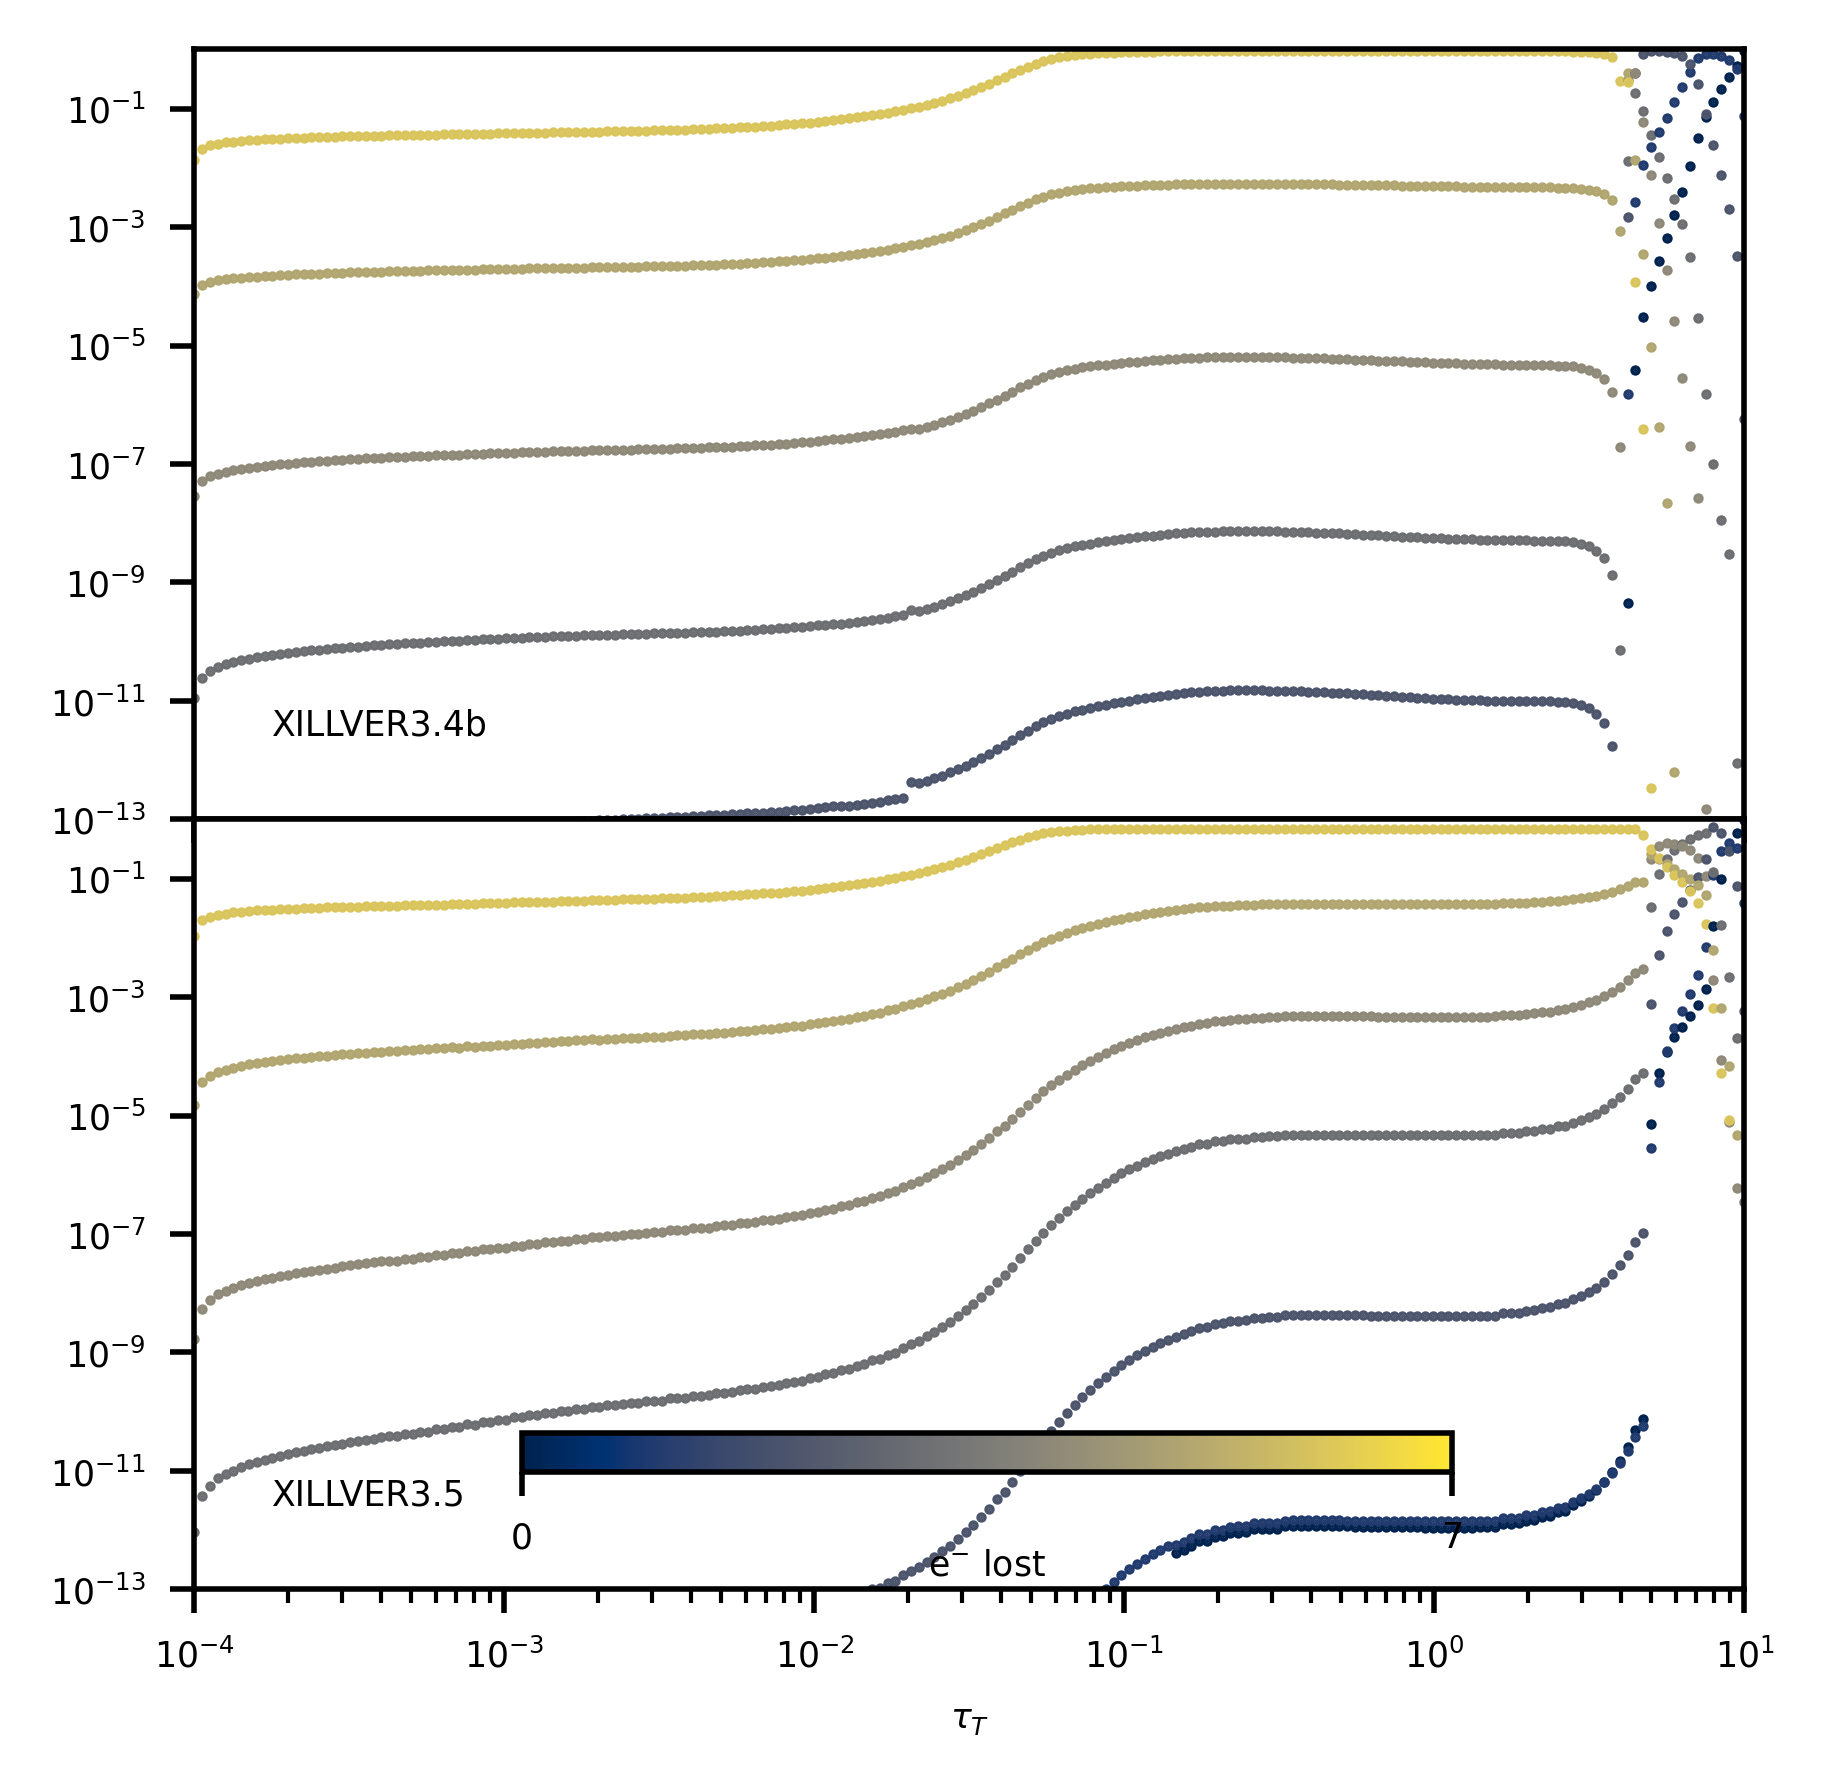

In [51]:
numrow=2
numcol=1

fig=plt.figure(figsize=(2*numrow,4*numcol),dpi=500)
gs = fig.add_gridspec(numrow,numcol, hspace=0)
axs=gs.subplots(sharex=True)
axdict1={}
axdict2={}
ms=0.5
sm = plt.cm.ScalarMappable(cmap=cmap)
ionselect=oselected
nion=len(ionselect)

colors=matplotlib.cm.cividis(np.arange(nion)/nion)

for layer in range(1,201):
    for eind,e in enumerate(ionselect):
        #print(e)
        #print(spect[layer-1][e])
        if layer==200:
            axdict1[e]=axs[0].plot(depth1[layer-1],specto[layer-1][e],'o',color=colors[eind],ms=ms)
            axdict2[e]=axs[1].plot(depth2[layer-1],spect[layer-1][e],'o',color=colors[eind],ms=ms)
        else:
            axs[0].plot(depth1[layer-1],specto[layer-1][e],'o',color=colors[eind],ms=ms)
            axs[1].plot(depth2[layer-1],spect[layer-1][e],'o',color=colors[eind],ms=ms)
axins1 = inset_axes(axs[1],
                    width="60%",  # width = 50% of parent_bbox width
                    height="5%",  # height : 5%
                    loc='lower left',
                    bbox_to_anchor=(0.2,0.13,1,1),
                    bbox_transform=axs[1].transAxes)
cbar=plt.colorbar(sm, ticks=np.linspace(0,1,2),orientation="horizontal",cax=axins1)
cbar.set_label(label=r"e$^{-}$ lost", labelpad=-1)
cbar.ax.set_xticklabels(['0','%d'%nion])
axs[0].text(0.05, 0.1,"XILLVER3.4b",transform=axs[0].transAxes,verticalalignment='bottom',horizontalalignment='left',fontsize=5)
axs[1].text(0.05, 0.1,"XILLVER3.5",transform=axs[1].transAxes,verticalalignment='bottom',horizontalalignment='left',fontsize=5)
axs[0].set_ylim([1e-13,1])
axs[1].set_ylim([1e-13,1])
axs[0].set_xlim([1e-4,10])
axs[1].set_xlim([1e-4,10])
axs[0].set_yscale('log')
axs[1].set_yscale('log')
axs[1].set_xscale('log')
axs[1].set_xlabel(r"$\tau_{T}$")
#axs[1].legend([axdict1[e] for e in feselected],labels=feselected,fontsize=5)
#axs[1].legend([axdict1[e] for e in feselected],labels=feselected)
fig.savefig("Oxygenstate.png")
#print(linetab[-1])
#gind=fraction>1e-15
#print(linetab[gind])
#print(fraction[gind])

In [82]:
linestyle_tuple = [
     ('loosely dotted',        (0, (1, 10))),
     ('dotted',                (0, (1, 1))),
     ('densely dotted',        (0, (1, 1))),
     ('long dash with offset', (5, (10, 3))),
     ('loosely dashed',        (0, (5, 10))),
     ('dashed',                (0, (5, 5))),
     ('densely dashed',        (0, (5, 1))),

     ('loosely dashdotted',    (0, (3, 10, 1, 10))),
     ('dashdotted',            (0, (3, 5, 1, 5))),
     ('densely dashdotted',    (0, (3, 1, 1, 1))),

     ('dashdotdotted',         (0, (3, 5, 1, 5, 1, 5))),
     ('loosely dashdotdotted', (0, (3, 10, 1, 10, 1, 10))),
     ('densely dashdotdotted', (0, (3, 1, 1, 1, 1, 1)))]

(0, (1, 10))

In [130]:
print(heato[1])
#print(heatosum[2]['Fe'])

{'H_1': 8.12576e+16, 'He_1': 5328540000000.0, 'He_2': 2.23021e+16, 'Li_1': 0.0, 'Li_2': 0.0, 'Li_3': 0.0, 'Be_1': 0.0, 'Be_2': 0.0, 'Be_3': 0.0, 'Be_4': 0.0, 'B_1': 0.0, 'B_2': 0.0, 'B_3': 0.0, 'B_4': 0.0, 'B_5': 0.0, 'C_1': 10508.6, 'C_2': 116207000.0, 'C_3': 16703700000.0, 'C_4': 4413950000000.0, 'C_5': 42130400000000.0, 'C_6': 3747740000000000.0, 'N_1': 0.0, 'N_2': 3.61862, 'N_3': 127246.0, 'N_4': 1316750000.0, 'N_5': 984994000000.0, 'N_6': 163181000000000.0, 'N_7': 2596040000000000.0, 'O_1': 0.0, 'O_2': 0.0, 'O_3': 0.0, 'O_4': 285340000.0, 'O_5': 157846000000.0, 'O_6': 64569600000000.0, 'O_7': 4703950000000000.0, 'O_8': 2.27845e+16, 'F_1': 0.0, 'F_2': 0.0, 'F_3': 0.0, 'F_4': 0.0, 'F_5': 0.0, 'F_6': 0.0, 'F_7': 0.0, 'F_8': 0.0, 'F_9': 0.0, 'Ne_1': 0.0, 'Ne_2': 0.0, 'Ne_3': 0.0, 'Ne_4': 0.0, 'Ne_5': 872930.0, 'Ne_6': 1471050000.0, 'Ne_7': 948566000000.0, 'Ne_8': 53769900000000.0, 'Ne_9': 1017580000000000.0, 'Ne_10': 961264000000000.0, 'Na_1': 0.0, 'Na_2': 0.0, 'Na_3': 0.0, 'Na_4': 0.

/tmp/ipykernel_3287167/1701339165.py:76: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  axs[1].legend([axdict1[e] for e in gion],ncols=4,labels=gion,fontsize=5,loc='lower center')


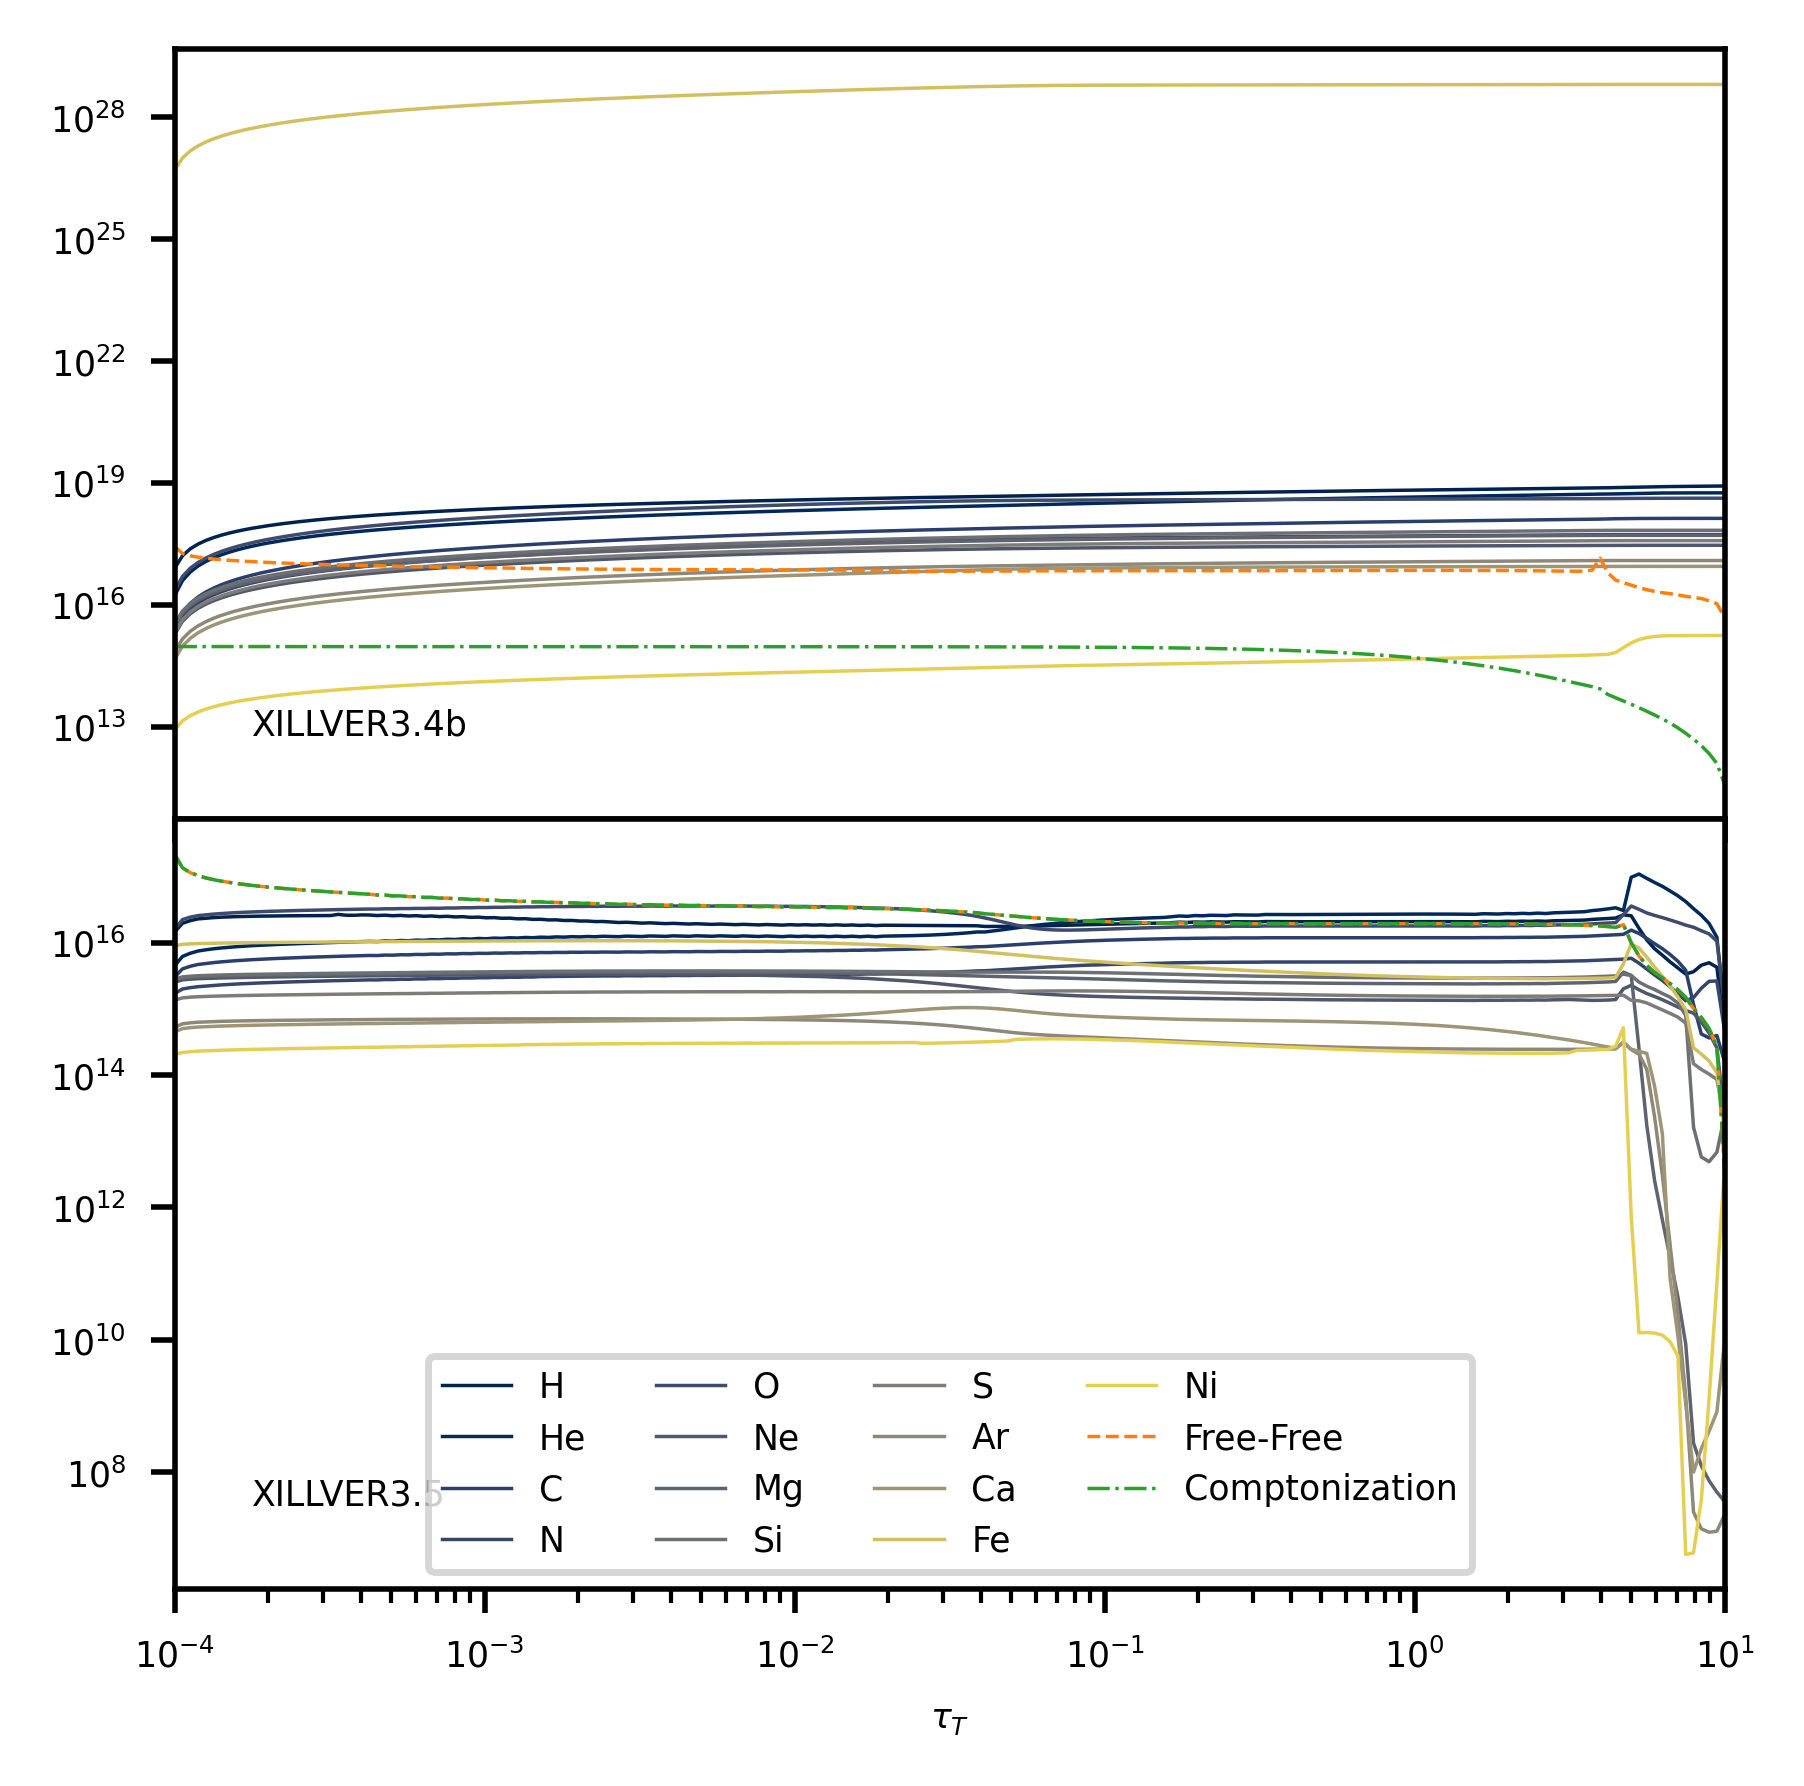

In [117]:
##Comparing heating
from numpy import random
numrow=2
numcol=1

fig=plt.figure(figsize=(2*numrow,4*numcol),dpi=500)
gs = fig.add_gridspec(numrow,numcol, hspace=0)
axs=gs.subplots(sharex=True)
axdict1={}
axdict2={}
lw=0.5
sm = plt.cm.ScalarMappable(cmap=cmap)
ionselect=elements
nion=len(ionselect)
gion=[]
colors=matplotlib.cm.cividis(np.arange(nion)/nion)

linestyle_tuple = [
     ('loosely dotted',        (0, (1, 10))),
     ('dotted',                (0, (1, 1))),
     ('densely dotted',        (0, (1, 1))),
     ('long dash with offset', (5, (10, 3))),
     ('loosely dashed',        (0, (5, 10))),
     ('dashed',                (0, (5, 5))),
     ('densely dashed',        (0, (5, 1))),
     ('loosely dashdotted',    (0, (3, 10, 1, 10))),
     ('dashdotted',            (0, (3, 5, 1, 5))),
     ('densely dashdotted',    (0, (3, 1, 1, 1))),
     ('dashdotdotted',         (0, (3, 5, 1, 5, 1, 5))),
     ('loosely dashdotdotted', (0, (3, 10, 1, 10, 1, 10))),
     ('densely dashdotdotted', (0, (3, 1, 1, 1, 1, 1)))]
ls=[lst[1] for lst in linestyle_tuple]
#,linestyle=ls[len(gion)]
for eind,e in enumerate(ionselect):
    #print(e)
    #print(spect[layer-1][e])
    
    y1=np.array([data[e] for data in heatosum])
    y2=np.array([data[e] for data in heat])
    if np.any(y1>10):
        axdict1[e]=axs[0].plot(depth1,y1,color=colors[eind],lw=lw)
        gion.append(e)
    if np.any(y2>10):
        axdict2[e]=axs[1].plot(depth2,y2,color=colors[eind],lw=lw)

#Adding f-f and Comptonization etc.
mech='Free-Free'
axdict1[mech]=axs[0].plot(depth1,htfreef1,'--C1',lw=lw)
axdict2[mech]=axs[1].plot(depth2,htfreef2,'--C1',lw=lw)
gion.append(mech)
mech='Comptonization'
axdict1[mech]=axs[0].plot(depth1,htcomp1,'-.C2',lw=lw)
axdict2[mech]=axs[1].plot(depth2,htfreef2,'-.C2',lw=lw)
gion.append(mech)

#axs[0].plot(depth1,htlines1,'-.C2',lw=lw)
#axins1 = inset_axes(axs[1],
#                    width="60%",  # width = 50% of parent_bbox width
#                    height="5%",  # height : 5%
#                    loc='lower left',
#                    bbox_to_anchor=(0.2,0.13,1,1),
#                    bbox_transform=axs[1].transAxes)
#cbar=plt.colorbar(sm, ticks=np.linspace(0,1,2),orientation="horizontal",cax=axins1)
#cbar.set_label(label=r"Z", labelpad=-1)
#cbar.ax.set_xticklabels(['0','%d'%nion])
axs[0].text(0.05, 0.1,"XILLVER3.4b",transform=axs[0].transAxes,verticalalignment='bottom',horizontalalignment='left',fontsize=5)
axs[1].text(0.05, 0.1,"XILLVER3.5",transform=axs[1].transAxes,verticalalignment='bottom',horizontalalignment='left',fontsize=5)
#axs[0].set_ylim([1e-13,1])
#axs[1].set_ylim([1e-13,1])
axs[0].set_xlim([1e-4,10])
axs[1].set_xlim([1e-4,10])
axs[0].set_yscale('log')
axs[1].set_yscale('log')
axs[1].set_xscale('log')
axs[1].set_xlabel(r"$\tau_{T}$")
axs[1].legend([axdict1[e] for e in gion],ncols=4,labels=gion,fontsize=5,loc='lower center')
#axs[1].legend([axdict1[e] for e in feselected],labels=feselected)
#fig.savefig("heatingrates.png")
#print(linetab[-1])
#gind=fraction>1e-15
#print(linetab[gind])
#print(fraction[gind])

In [61]:
print(gion)

['h', 'he', 'c', 'n', 'o', 'ne', 'mg', 'si', 's', 'ar', 'ca', 'fe', 'ni']


/tmp/ipykernel_3287167/4073801655.py:56: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  axs[0].legend([axdict1[e] for e in gion],ncols=4,labels=gion,fontsize=5,loc='lower center')


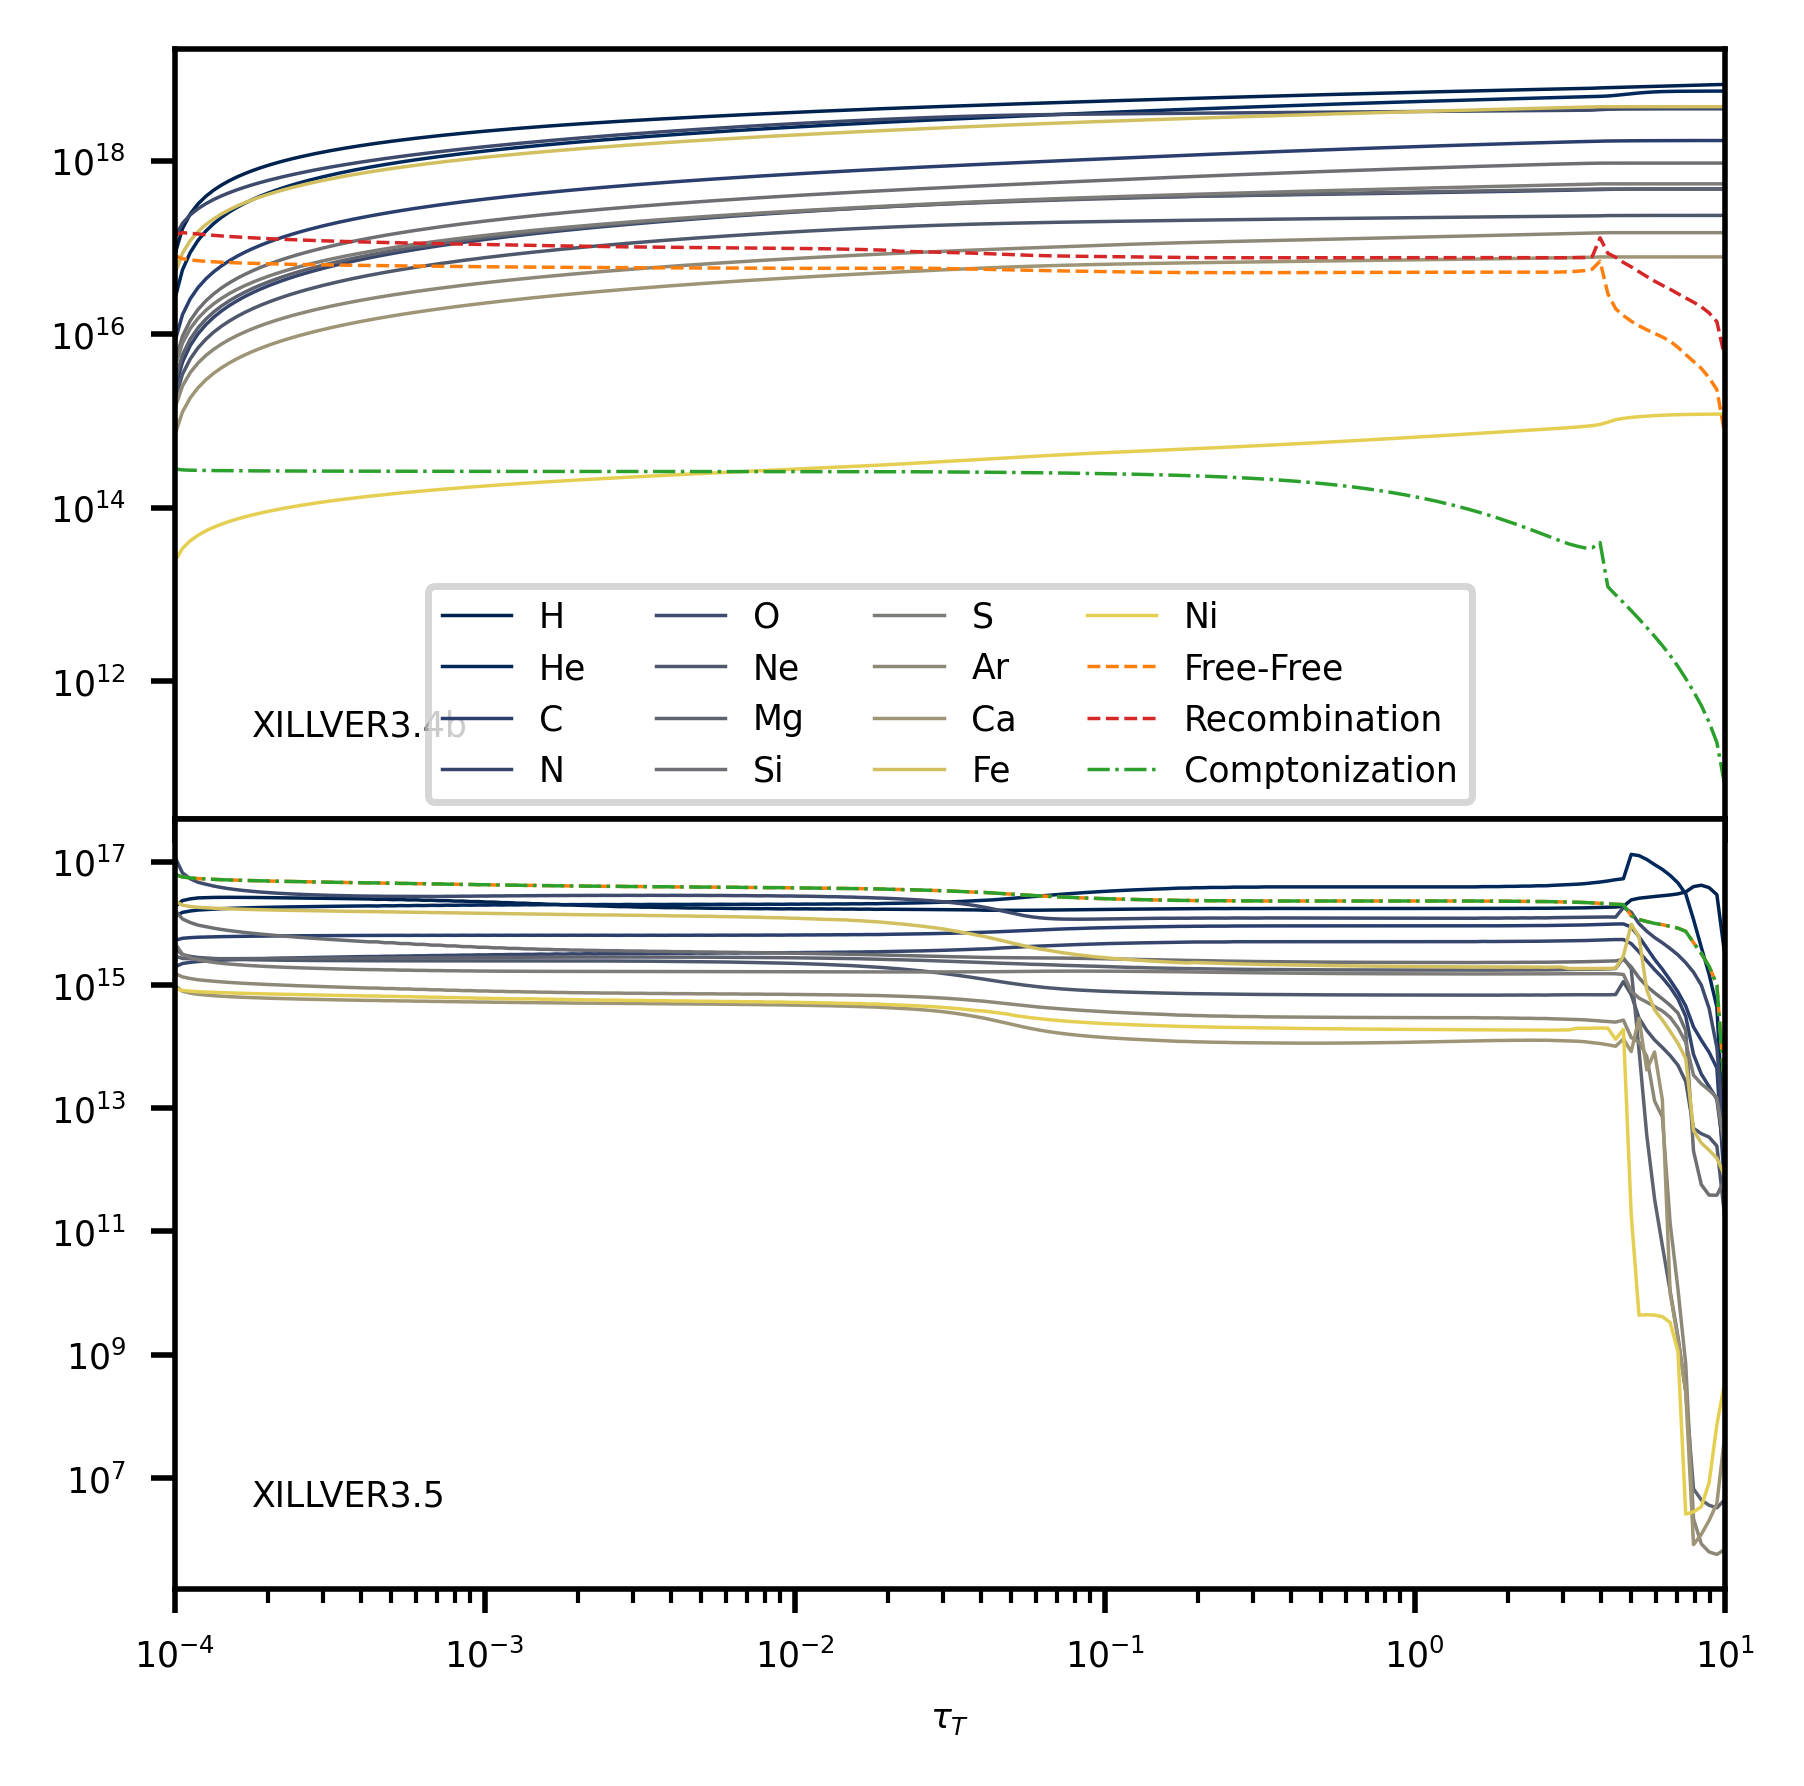

In [109]:
##Comparing cooling profile

numrow=2
numcol=1

fig=plt.figure(figsize=(2*numrow,4*numcol),dpi=500)
gs = fig.add_gridspec(numrow,numcol, hspace=0)
axs=gs.subplots(sharex=True)
axdict1={}
axdict2={}
ms=0.5
sm = plt.cm.ScalarMappable(cmap=cmap)
ionselect=elements
nion=len(ionselect)
gion=[]
colors=matplotlib.cm.cividis(np.arange(nion)/nion)

for eind,e in enumerate(ionselect):
    #print(e)
    #print(spect[layer-1][e])
    
    y1=np.array([data[e] for data in coolo])
    y2=np.array([data[e] for data in cool])
    if np.any(y1>10):
        axdict1[e]=axs[0].plot(depth1,y1,color=colors[eind],lw=lw)
        gion.append(e)
    if np.any(y2>10):
        axdict2[e]=axs[1].plot(depth2,y2,color=colors[eind],lw=lw)
        
#Adding f-f and Comptonization etc.
mech='Free-Free'
axdict1[mech]=axs[0].plot(depth1,clfreef1,'--C1',lw=lw)
axdict2[mech]=axs[1].plot(depth2,clfreef2,'--C1',lw=lw)
gion.append(mech)
mech='Recombination'
axdict1[mech]=axs[0].plot(depth1,clrec1,'--C3',lw=lw)
gion.append(mech)
#mech='Line Cooling'
#axdict1[mech]=axs[0].plot(depth1,cllines1,'-.C4',lw=lw)
#gion.append(mech)
mech='Comptonization'
axdict1[mech]=axs[0].plot(depth1,clcomp1,'-.C2',lw=lw)
axdict2[mech]=axs[1].plot(depth2,clfreef2,'-.C2',lw=lw)
gion.append(mech)

axs[0].text(0.05, 0.1,"XILLVER3.4b",transform=axs[0].transAxes,verticalalignment='bottom',horizontalalignment='left',fontsize=5)
axs[1].text(0.05, 0.1,"XILLVER3.5",transform=axs[1].transAxes,verticalalignment='bottom',horizontalalignment='left',fontsize=5)
#axs[0].set_ylim([1e-13,1])
#axs[1].set_ylim([1e-13,1])
axs[0].set_xlim([1e-4,10])
axs[1].set_xlim([1e-4,10])
axs[0].set_yscale('log')
axs[1].set_yscale('log')
axs[1].set_xscale('log')
axs[1].set_xlabel(r"$\tau_{T}$")
axs[0].legend([axdict1[e] for e in gion],ncols=4,labels=gion,fontsize=5,loc='lower center')
#axs[1].legend([axdict1[e] for e in feselected],labels=feselected)
fig.savefig("coolingrates.png")
#print(linetab[-1])
#gind=fraction>1e-15
#print(linetab[gind])
#print(fraction[gind])

Text(0.05, 0.1, 'n20_logxi_3')

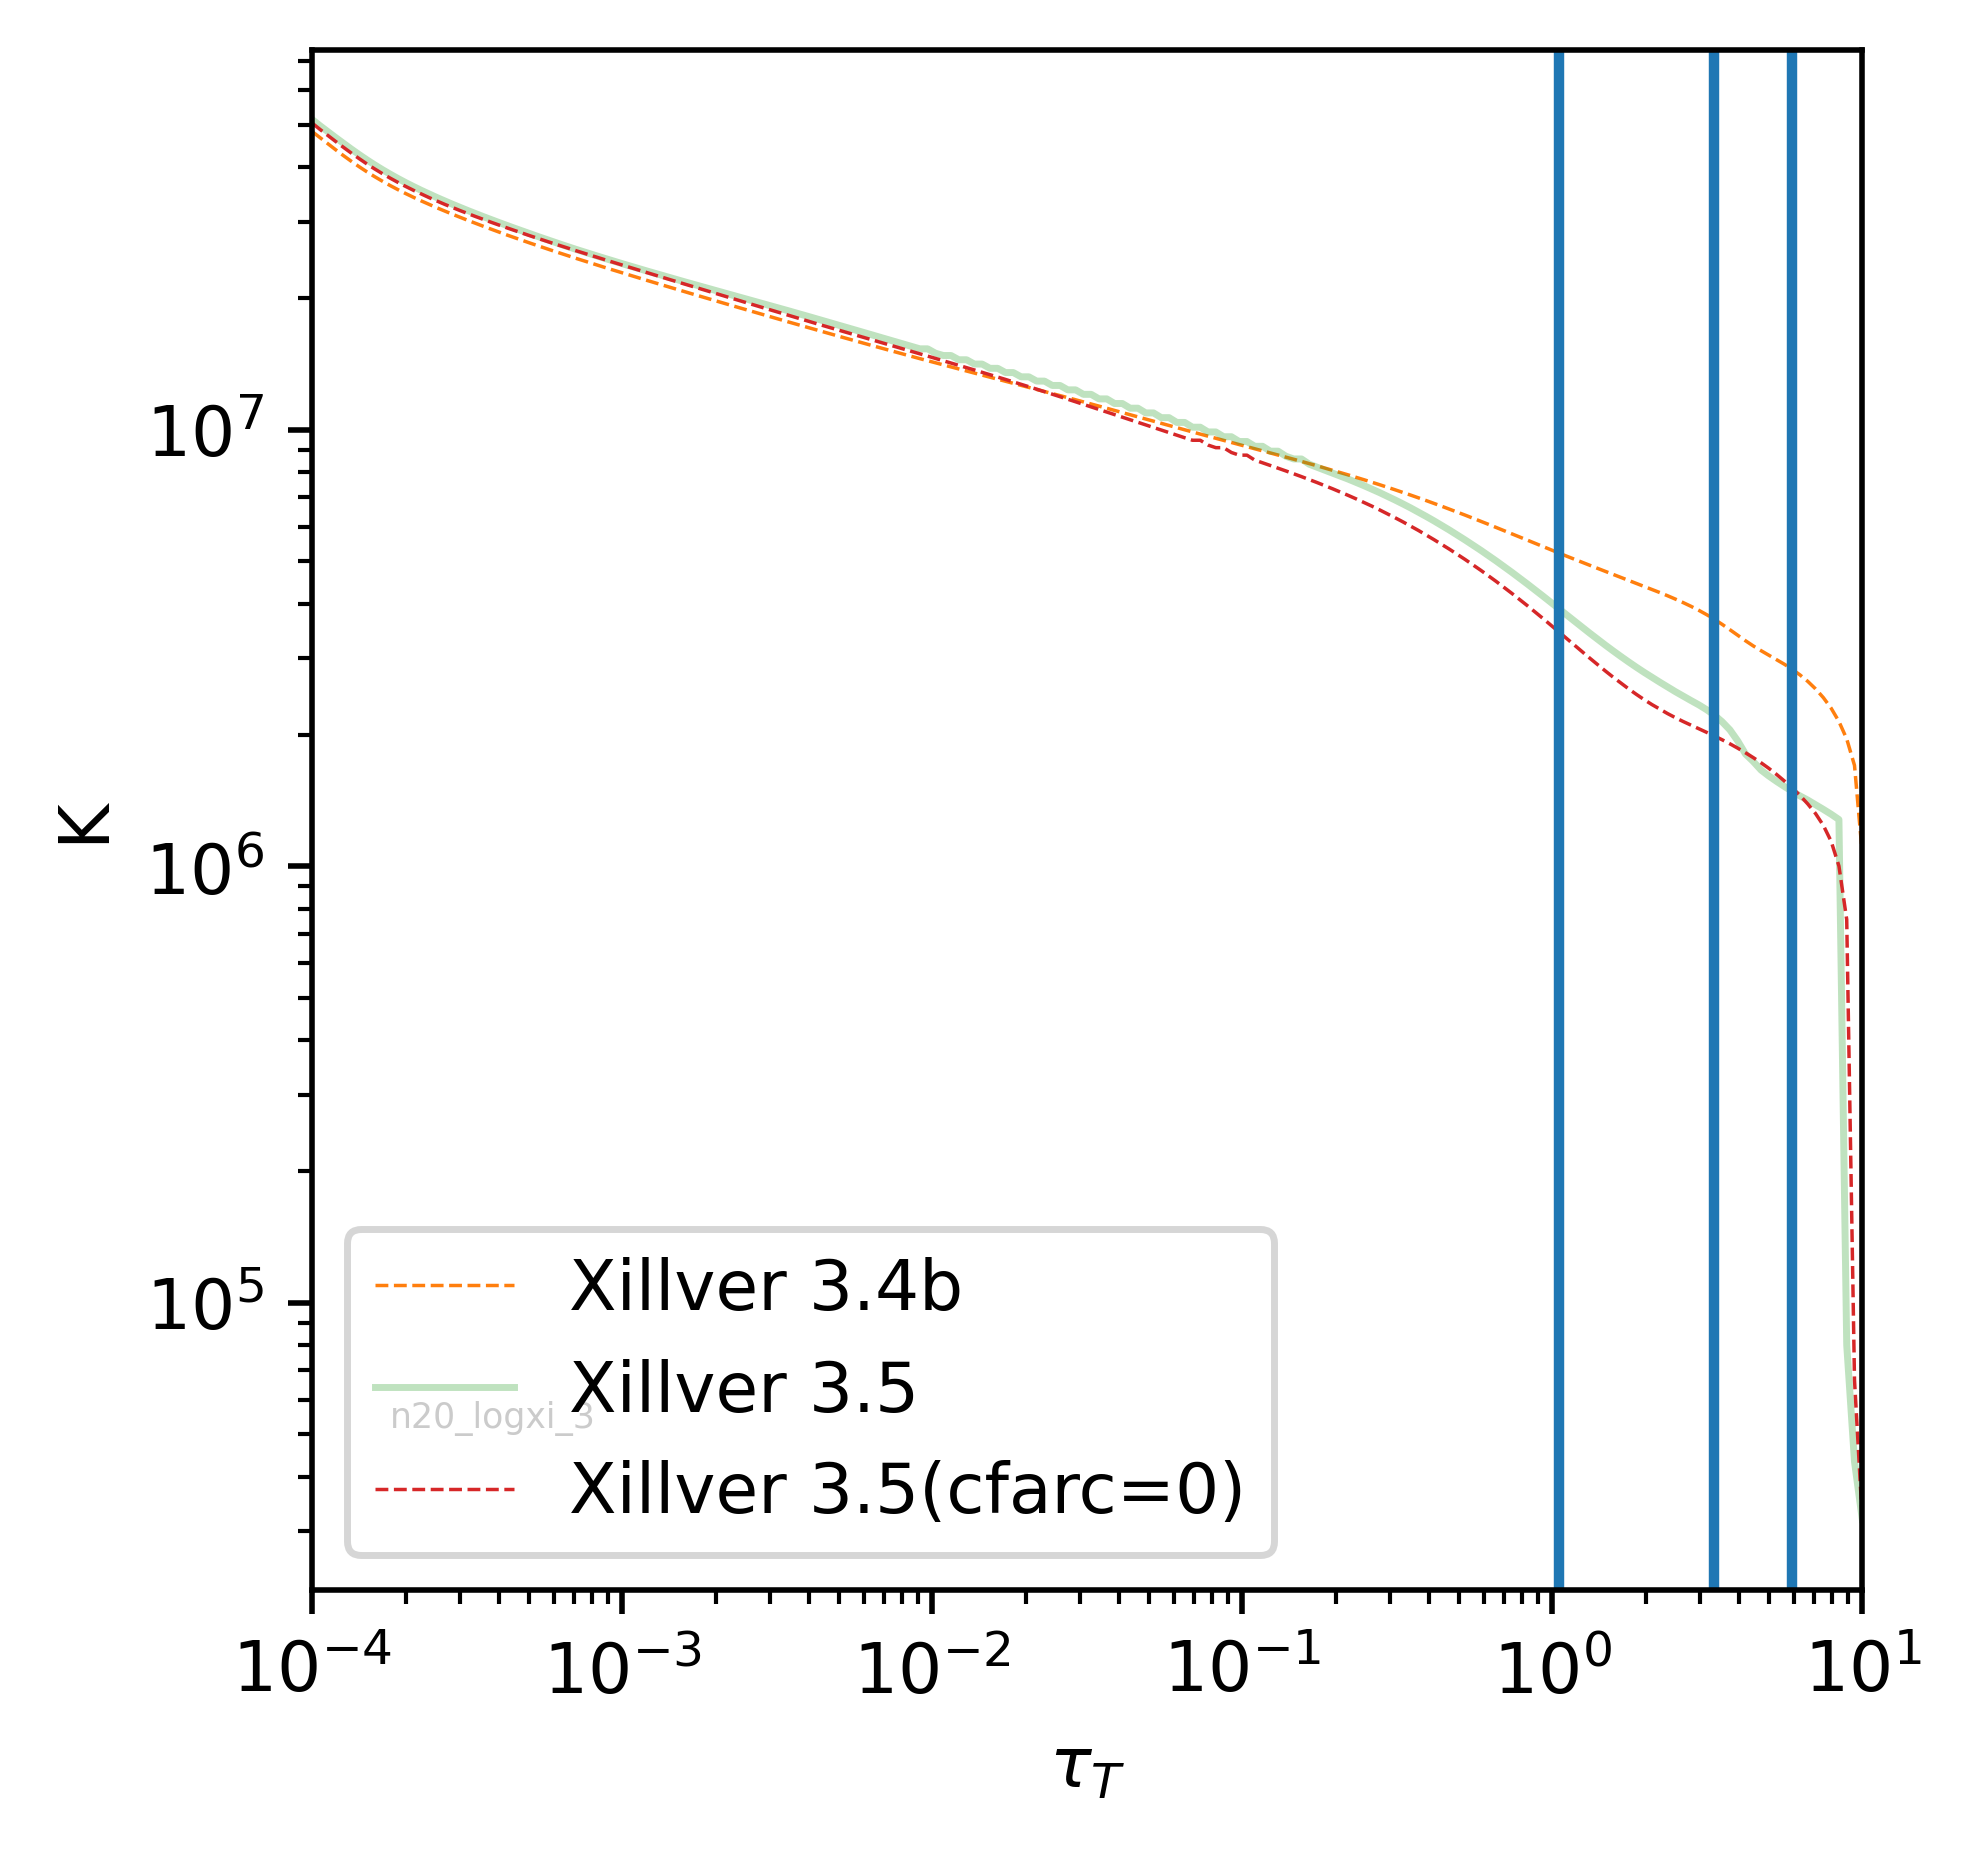

In [324]:
#ploting temperature profile
numrow=1
numcol=1

fig=plt.figure(figsize=(4*numrow,4*numcol),dpi=500)
gs = fig.add_gridspec(numrow,numcol, hspace=0)
axs=gs.subplots(sharex=True)

ms=0.5



axs.plot(depth1,temp1,'--',color='C1',lw=0.5,label="Xillver 3.4b")
axs.plot(depth2,temp2,color='C2',lw=1,label="Xillver 3.5",alpha=0.3)
axs.plot(depth3,temp3,'--',color='C3',lw=0.5,label="Xillver 3.5(cfarc=0)")
#axs[0].text(0.05, 0.1,"XILLVER3.4b",transform=axs[0].transAxes,verticalalignment='bottom',horizontalalignment='left',fontsize=5)
#axs[1].text(0.05, 0.1,"XILLVER3.5",transform=axs[1].transAxes,verticalalignment='bottom',horizontalalignment='left',fontsize=5)
#axs.set_ylim([1e-13,1])
axs.set_xlim([1e-4,10])
axs.axvline(x=depth1[190])
axs.axvline(x=depth1[180])
axs.axvline(x=depth1[160])
#axs[0].set_yscale('log')
#axs[1].set_yscale('log')
axs.set_xscale('log')
axs.set_yscale('log')
axs.set_xlabel(r"$\tau_{T}$")
axs.set_ylabel("K")
#axs.set_ylim([0,5e7])
#axs[1].legend([axdict1[e] for e in feselected],labels=feselected,fontsize=5)
#axs[1].legend([axdict1[e] for e in feselected],labels=feselected)
axs.legend()
axs.text(0.05, 0.1,"{}".format(datype),transform=axs.transAxes,verticalalignment='bottom',horizontalalignment='left',fontsize=5)
#fig.savefig("tempprof{}.png".format(datype))
#print(linetab[-1])
#gind=fraction>1e-15
#print(linetab[gind])
#print(fraction[gind])

In [225]:
gind=fraction>1e-15
gindo=fractiono>1e-15
feselected=['fe_18','fe_19','fe_20','fe_21','fe_22','fe_23','fe_24','fe_25','fe_26']
#print(gind)
glinetab=np.array(linetab)[gind]
glinetabo=np.array(linetab)[gindo]
#gfraction=fraction[gind]
#feind = glinetab==feselected

print([linedic[e] for e in feselected])
print([linedico[e] for e in feselected])
print(glinetab)
print(glinetabo)



[0.0334615, 0.207678, 0.526593, 0.146037, 0.0789922, 0.00384452, 0.000142551, 6.86447e-06]
[0.0, 0.0, 0.0, 7.35571e-11, 6.29749e-08, 7.48663e-06, 0.000899651, 0.0414659]
['h_1' 'he_1' 'he_2' 'c_3' 'c_4' 'c_5' 'c_6' 'n_4' 'n_5' 'n_6' 'n_7' 'o_4'
 'o_5' 'o_6' 'o_7' 'o_8' 'ne_5' 'ne_6' 'ne_7' 'ne_8' 'ne_9' 'ne_10' 'mg_6'
 'mg_7' 'mg_8' 'mg_9' 'mg_10' 'mg_11' 'mg_12' 'si_6' 'si_7' 'si_8' 'si_9'
 'si_10' 'si_11' 'si_12' 'si_13' 'si_14' 's_8' 's_9' 's_10' 's_11' 's_12'
 's_13' 's_14' 's_15' 's_16' 'ar_9' 'ar_10' 'ar_11' 'ar_12' 'ar_13'
 'ar_14' 'ar_15' 'ar_16' 'ar_17' 'ar_18' 'ca_10' 'ca_11' 'ca_12' 'ca_13'
 'ca_14' 'ca_15' 'ca_16' 'ca_17' 'ca_18' 'ca_19' 'ca_20' 'fe_12' 'fe_13'
 'fe_14' 'fe_15' 'fe_16' 'fe_17' 'fe_18' 'fe_19' 'fe_20' 'fe_21' 'fe_22'
 'fe_23' 'fe_24' 'fe_25' 'ni_15' 'ni_16' 'ni_17' 'ni_18' 'ni_19' 'ni_20'
 'ni_21' 'ni_22' 'ni_23' 'ni_24' 'ni_25' 'ni_26']
['h_1' 'he_1' 'he_2' 'c_4' 'c_5' 'c_6' 'n_5' 'n_6' 'n_7' 'o_6' 'o_7' 'o_8'
 'ne_8' 'ne_9' 'ne_10' 'mg_9' 'mg_10' 'mg_11' '

In [575]:
Intensity=bbnu(specE1*eV/h,2263*eV/kb)

In [608]:
Intensity=bbnu(6336*eV/h,2263*eV/kb)
print(specE1[950])

2.272864111


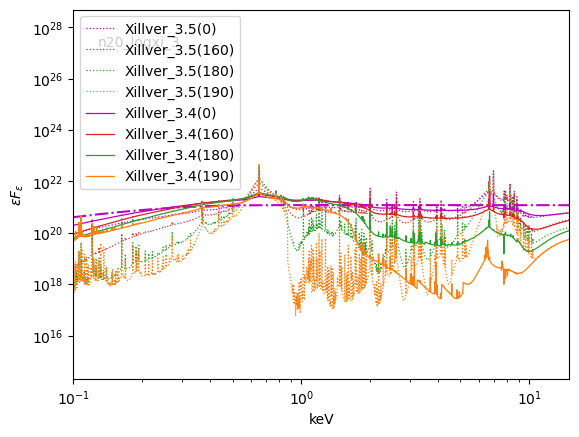

In [341]:
import matplotlib.pyplot as plt
fac=1e20

#nac=1.
#plt.plot(rxinput[0],fac*rxinput[2],"r-.")
#plt.plot(rxinput[0],fac*rxinput[3],"r",label="Reflionx",lw=0.5)

#plt.plot(specE1/1e3,foutE1*specE1*eV,"c",label="Xillver_3.4b",ms=1)
#plt.plot(specE1/1e3,fionizE1*specE1*eV,"c-.",ms=0.5)
#plt.plot(specE1[:4000]/1e3,fionizE11[:4000]*specE1[:4000]/1e3,"g-.",ms=0.5)

plt.plot(specE3/1e3,foutE2*eV*specE3,"m",ms=0.5,label="Xillver_3.5(0)",lw=0.9,ls=':')
#plt.plot(specE3/1e3,fionizE1*eV*specE3,"m-.",ms=0.5)
plt.plot(specE3/1e3,foutE2_160*eV*specE3,"C3",ms=0.5,label="Xillver_3.5(160)",lw=0.9,ls=':')
plt.plot(specE3/1e3,foutE2_180*eV*specE3,"C2",ms=0.5,label="Xillver_3.5(180)",lw=0.9,ls=':')
plt.plot(specE3/1e3,foutE2_190*eV*specE3,"C1",ms=0.5,label="Xillver_3.5(190)",lw=0.9,ls=':')


plt.plot(specE3/1e3,foutE1*eV*specE3,"m",ms=0.5,label="Xillver_3.4(0)",lw=0.9)
plt.plot(specE3/1e3,fionizE1*eV*specE3,"m-.",ms=0.5)
plt.plot(specE3/1e3,foutE1_160*eV*specE3,"C3",ms=0.5,label="Xillver_3.4(160)",lw=0.9)
plt.plot(specE3/1e3,foutE1_180*eV*specE3,"C2",ms=0.5,label="Xillver_3.4(180)",lw=0.9)
plt.plot(specE3/1e3,foutE1_190*eV*specE3,"C1",ms=0.5,label="Xillver_3.4(190)",lw=0.9)

#plt.plot(specE2/1e3,foutE2*specE2*eV,"b",ms=0.5,label="Xillver_3.5",lw=0.5)
#plt.plot(specE2/1e3,fionizE2*specE2*eV,"b-.",ms=0.5)
#plt.plot(specE2[:4000]/1e3,fionizE22[:4000]*specE2[:4000]/1e3,"g--",ms=0.5)
#plt.plot(specE2[:4000]/1e3,fionizE22in[:4000]*specE2[:4000]/1e3,"g--",ms=0.5)


#pfac=8e22
#plt.plot(xvals,pfac*np.array(yvals)t,"g",label="pexrav")
#plt.plot(xorgvals,pfac*np.array(yorgvals),"g--")


plt.xscale("log")
plt.legend()
plt.yscale("log")
plt.xlabel("keV")
plt.ylabel(r"$\epsilon F_{\epsilon}$")
plt.xlim([1e-1,15])
plt.ylim([2e14,5e28])
#plt.axvline(x=)
axs=plt.gca()
plt.text(0.05,0.9,datype,transform=axs.transAxes)
plt.savefig("test"+datype,dpi=300)

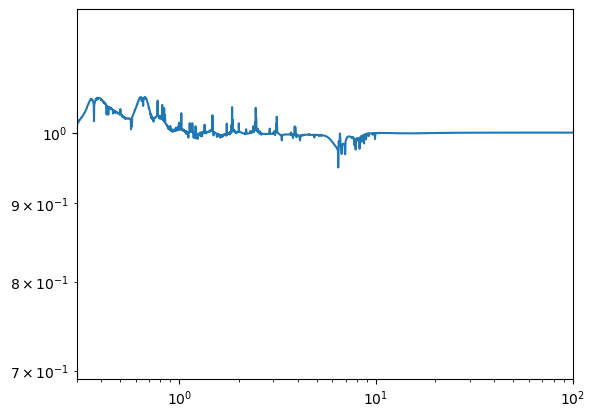

In [211]:
ra=foutE3[:4900]/foutE2[:4900]
plt.plot(specE2[:4900]/1e3,ra)
plt.xlim([0.3,100])
plt.xscale("log")
plt.yscale("log")


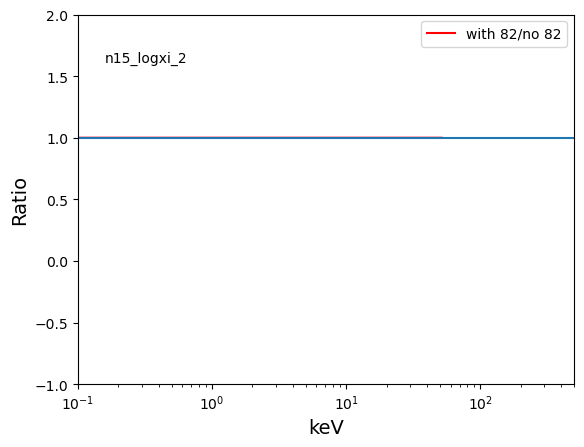

In [731]:
plt.plot(specE1[:4000]/1e3,foutE1[:4000]/foutE3[:4000],"r",ms=0.5,label="with 82/no 82")
plt.legend()
plt.axhline(y=1)
plt.text(0.05,0.9,datype,transform=axs.transAxes)
plt.xlabel("keV")
plt.ylabel("Ratio")
plt.xlim([0.1,500])
plt.ylim([-1,2])
plt.xscale("log")

In [92]:
from xspec import *
AllModels.clear()
Xset.restore("/disk/bifrost/yuanze/software/table_generator/test.xcm")
AllModels.setEnergies(".1 100. 1000 log")
Plot.add = True
Plot("model")
x=np.array(Plot.x())
y=np.array(Plot.model())


***Warning: The file sent to Xset.restore(): /disk/bifrost/yuanze/software/table_generator/test.xcm
    is not detected to be a file generated from Xset.save().
    Xset.restore() usage is only intended for Xset.save() output.
    General XSPEC/Tcl scripts may not fully execute in PyXspec.


 Solar Abundance Vector set to angr:  Anders E. & Grevesse N. Geochimica et Cosmochimica Acta 53, 197 (1989)
 Cross Section Table set to vern:  Verner, Ferland, Korista, and Yakovlev 1996
Parameter delta values for fits will now be 0.01 * parValue
 Model systematic error set to 0

Model atable{/disk/bifrost/yuanze/software/table_generator/Xillver3_5_v2.fits}<1> Source No.: 1   Active/Off
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   Xillver3.5 logn                15.0000      +/-  0.0          
   2    1   Xillver3.5 Gamma               2.00000      +/-  0.0          
   3    1   Xillver3.5 logxi               3.00000      +/-  0.0          
   4    1   Xillver3.5 z      

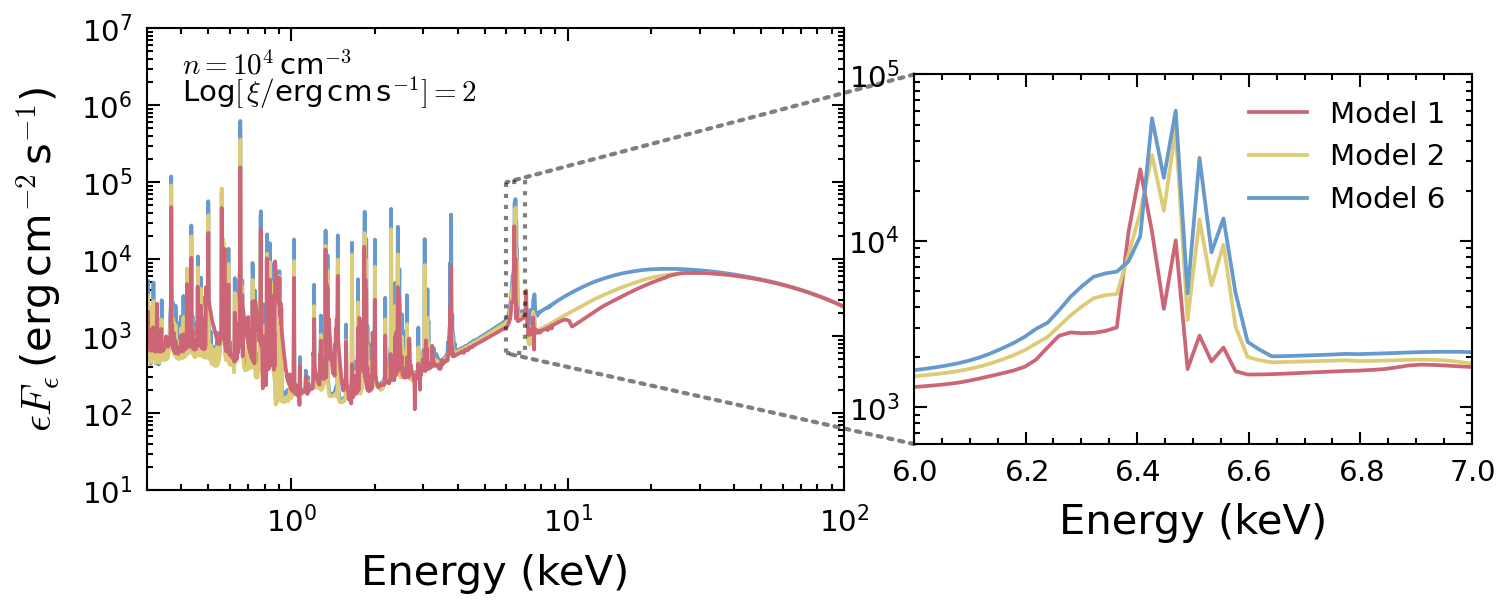

In [87]:
#Comparing Comptonization....
import numpy as np
from os.path import join

import matplotlib.pyplot as plt
density=4
logxi=2
datype="n{}_logxi_{}".format(density,logxi)
rpath="/disk/bifrost/yuanze/xillver_res/xillver3.5_mo2/"+datype
rpath2="/disk/bifrost/yuanze/xillver_res/xillver3.5_modified/"+datype
rpath3="/disk/bifrost/yuanze/xillver_res/ktbb1/"+datype+"_bin5000"
version=""
bN=5000
ite=14
skip=(bN+2)*ite
specEH1=np.loadtxt(join(rpath+version,"current/spectr"),usecols=0,max_rows=bN,skiprows=skip)
foutH1=np.loadtxt(join(rpath+version,"current/spectr"),usecols=1,max_rows=bN,skiprows=skip)
#uH1=np.loadtxt(join(rpath+version,"current/intensity"),max_rows=bN,skiprows=skip)
fionizH1=np.loadtxt(join(rpath+version,"current/spectr"),usecols=5,max_rows=bN,skiprows=skip)
tempeV1=np.loadtxt(join(rpath+version,"current/temper"),usecols=1,max_rows=200,skiprows=(200+2)*ite)
temp1=tempeV1*eV/kb

bN=5000
ite=0
skip=(bN+2)*ite
#version="3.5"
#specEH2=np.loadtxt(join(rpath+version,"current/spectr"),usecols=0,max_rows=bN,skiprows=skip)
foutH2=np.loadtxt(join(rpath2,"current/spectr"),usecols=1,max_rows=bN,skiprows=skip)
#fionizH2=np.loadtxt(join(rpath+version,"current/spectr"),usecols=5,max_rows=bN,skiprows=skip)
specEH2=np.loadtxt(join(rpath2,"current/spectr"),usecols=0,max_rows=bN,skiprows=skip)
#foutH2=np.loadtxt(join(rpath2,"current/intensity"),usecols=9,max_rows=bN,skiprows=skip)
uH2=np.loadtxt(join(rpath2,"current/intensity"),max_rows=bN,skiprows=skip)
fionizH2=np.loadtxt(join(rpath2,"current/spectr"),usecols=5,max_rows=bN,skiprows=skip)
tempeV2=np.loadtxt(join(rpath2+version,"current/temper"),usecols=1,max_rows=200,skiprows=(200+2)*ite)
temp2=tempeV2*eV/kb

bN=5000
ite=0
skip=(bN+2)*ite
#version="3.5"
#specEH2=np.loadtxt(join(rpath+version,"current/spectr"),usecols=0,max_rows=bN,skiprows=skip)
foutH3=np.loadtxt(join(rpath3,"current/spectr"),usecols=1,max_rows=bN,skiprows=skip)
#fionizH2=np.loadtxt(join(rpath+version,"current/spectr"),usecols=5,max_rows=bN,skiprows=skip)
specEH3=np.loadtxt(join(rpath3,"current/spectr"),usecols=0,max_rows=bN,skiprows=skip)
#foutH2=np.loadtxt(join(rpath2,"current/intensity"),usecols=9,max_rows=bN,skiprows=skip)
uH3=np.loadtxt(join(rpath3,"current/intensity"),max_rows=bN,skiprows=skip)
fionizH3=np.loadtxt(join(rpath3,"current/spectr"),usecols=5,max_rows=bN,skiprows=skip)
tempeV3=np.loadtxt(join(rpath3+version,"current/temper"),usecols=1,max_rows=200,skiprows=(200+2)*ite)
temp3=tempeV3*eV/kb

import scienceplots
plt.style.use(["science",'no-latex'])
plt.rcParams.update({
    "font.family": "dejavu sans",   # specify font family here
    "font.serif": ["Times"],  # specify font here
    "font.size":7,
"legend.fancybox":True})
#specEH2=np.loadtxt(join(rpath2,"current/spectr"),usecols=0,max_rows=bN,skiprows=skip)
#foutH2=np.loadtxt(join(rpath2,"current/intensity"),usecols=9,max_rows=bN,skiprows=skip)
colorlst=["#CC6677","#DDCC77","#6699CC"]
fig=plt.figure(figsize=(3,2),dpi=300)
gs = fig.add_gridspec(1,1, hspace=0)
axs=gs.subplots(sharex=True)
lw=0.9
fac=1.0
#axs.plot(specEH3/1e3,specEH3*eV*fionizH3,"g*",ms=0.5)
#axs.plot(specEH2/1e3,specEH2*eV*fionizH2,"r*",ms=0.5)
axs.plot(specEH2/1e3,specEH2*eV*foutH2,colorlst[2],ms=0.5,label="Xillver 3.5 (ATDB21)",lw=lw)

axs.plot(specEH1/1e3,fac*specEH1*eV*foutH1,colorlst[1],ms=0.5,label="Xillver 3.5",lw=lw)
#axs.plot(specEH1/1e3,fac*specEH1*eV*fionizH1,"b--",ms=0.5)

axs.plot(specEH3/1e3,specEH3*eV*foutH3,colorlst[0],ms=0.5,label="Xillver 3.4b",lw=lw)








axs.set_xscale("log")
axs.set_yscale("log")
axs.set_xlabel("Energy (keV)",fontsize=10)
axs.set_ylabel(r"$\epsilon F_{\epsilon}\,$(erg$\,$cm$^{-2}\,$s$^{-1}$)",fontsize=10)
axs.set_xlim([0.3,100])
axs.text(0.05,0.90,r"$n=10^{%d}\,$cm$^{-3}$"%density,transform=axs.transAxes)
axs.text(0.05,0.84,r"Log$[\,\xi/$erg$\,$cm$\,$s$^{-1}]=%d $"%logxi,transform=axs.transAxes)
axs.set_ylim([1e1,1e7])


axins=axs.inset_axes([1.1,0.1,0.8,0.8])
axins.plot(specEH3/1e3,specEH3*eV*foutH3,colorlst[0],ms=0.5,label="Model 1",lw=lw)
axins.plot(specEH1/1e3,fac*specEH1*eV*foutH1,colorlst[1],ms=0.5,label="Model 2",lw=lw)
axins.plot(specEH2/1e3,specEH2*eV*foutH2,colorlst[2],ms=0.5,label="Model 6",lw=lw)

axins.set_xlim([6,7])
axins.set_ylim([6e2,1e5])
#axins.set_xscale("log")
axins.set_yscale("log")
axins.set_xlabel("Energy (keV)",fontsize=10)
axins.legend()
rec,clines=axs.indicate_inset_zoom(axins,edgecolor="k",ls=':')
clines[0].set_linestyle(':')
clines[1].set_linestyle(':')
#clines[1].set(arrowstyle='wedge')
#axins.set_yticks([])
#axins.set_yticklabels([])
#ax3ins.axhline(y=1,c="k",lw=1)




#axs=plt.gca()
#plt.text(0.05,0.9,datype,transform=axs.transAxes)
plt.savefig("./pub2/lowncomp.pdf",dpi=300)

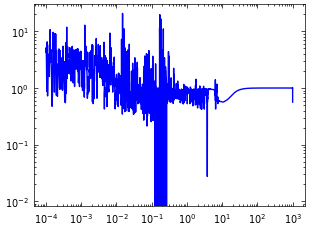

In [11]:
plt.plot(specEH1/1000,foutH1/foutH2,"b")

#plt.ylim([1e5,4e5])
plt.yscale("log")
plt.xscale("log")
#plt.xlim([0,200])

In [71]:
clines

(<matplotlib.patches.ConnectionPatch at 0x7fe3b22e7ca0>,
 <matplotlib.patches.ConnectionPatch at 0x7fe3b22f5150>)

/tmp/ipykernel_2479280/2573948838.py:6: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim([0,200])


(0.767462821883893, 200)

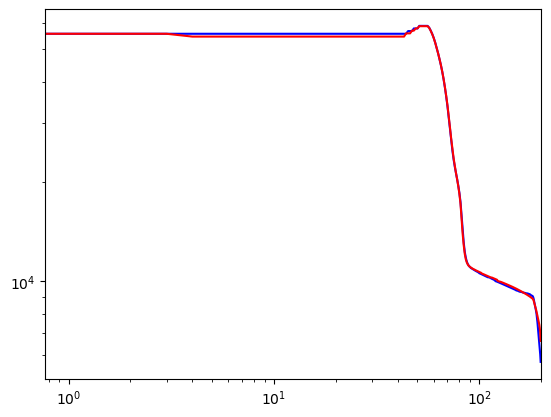

In [322]:
plt.plot(np.arange(0,200),temp1,"b")
plt.plot(np.arange(0,200),temp2,"r")
#plt.ylim([1e5,4e5])
plt.yscale("log")
plt.xscale("log")
plt.xlim([0,200])

In [315]:
##Testing the difference between 2.57 and 2.58e




import sys
from xspec import *
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits as pyfits
org1data={'energy':[],'transmit':[],'density':[],'column':[],"logxi":[]}

org2data={'energy':[],'transmit':[],'density':[],'column':[],"logxi":[]}
dbtype="HD"

dselect=np.array(["20"])
cselect=np.array(["1.E+20","1.E+21","1.E+22"])
xselect=np.array(["1","2","3"])

#emit_out=[]

norm=1e-1
# Energies
AllModels.setEnergies("0.1 5. 1000 log")
Plot.xAxis = "keV"
for i,dense in enumerate(dselect):
    for j,column in enumerate(cselect):
        for k,logxi in enumerate(xselect):
            # Define the Model
            m1 = Model("pow*mtable{/Users/ding/xstarHD/result/stable/xstar_%s/n%s_re/xout_mtable.fits}"%(dbtype,dense))

            m1(1).values = "2.0"      # powerlaw   PhoIndex
            m1(2).values = norm      # powerlaw   norm
            m1(3).values = column   # template   column
            m1(4).values = logxi      # template   rlogxi
            m1(5).values = "0.0"      # template   z
            Plot("eemodel")
            org1data['energy'].append(Plot.x())
            org1data['transmit'].append(Plot.model())
            org1data['density'].append(dense)
            org1data['column'].append(column)
            org1data['logxi'].append(logxi)
            AllModels.clear()
            
            m1 = Model("pow*mtable{/Users/ding/xstarHD/result/xstar_257_210616/n%s_re/xout_mtable.fits}"%(dense))

            m1(1).values = "2.0"      # powerlaw   PhoIndex
            m1(2).values = norm      # powerlaw   norm
            m1(3).values = column   # template   column
            m1(4).values = logxi      # template   rlogxi
            m1(5).values = "0.0"      # template   z
            Plot("eemodel")
            org2data['energy'].append(Plot.x())
            org2data['transmit'].append(Plot.model())
            org2data['density'].append(dense)
            org2data['column'].append(column)
            org2data['logxi'].append(logxi)
            AllModels.clear()

            


Models will now use energy array created from:
   0.1 - 5   1000 log bins

New filename ( "none" or "/*" to return to the XSPEC prompt): No such file: 
New filename ( "none" or "/*" to return to the XSPEC prompt): No such file: 
New filename ( "none" or "/*" to return to the XSPEC prompt): 

Error: cannot read file /Users/ding/xstarHD/result/stable/xstar_HD/n20_re/xout_mtable.fits
terminated at user request


Exception: Model Command Error

FileNotFoundError: /disk/bifrost/yuanze/xillver_res/o_comp/current/temper not found.

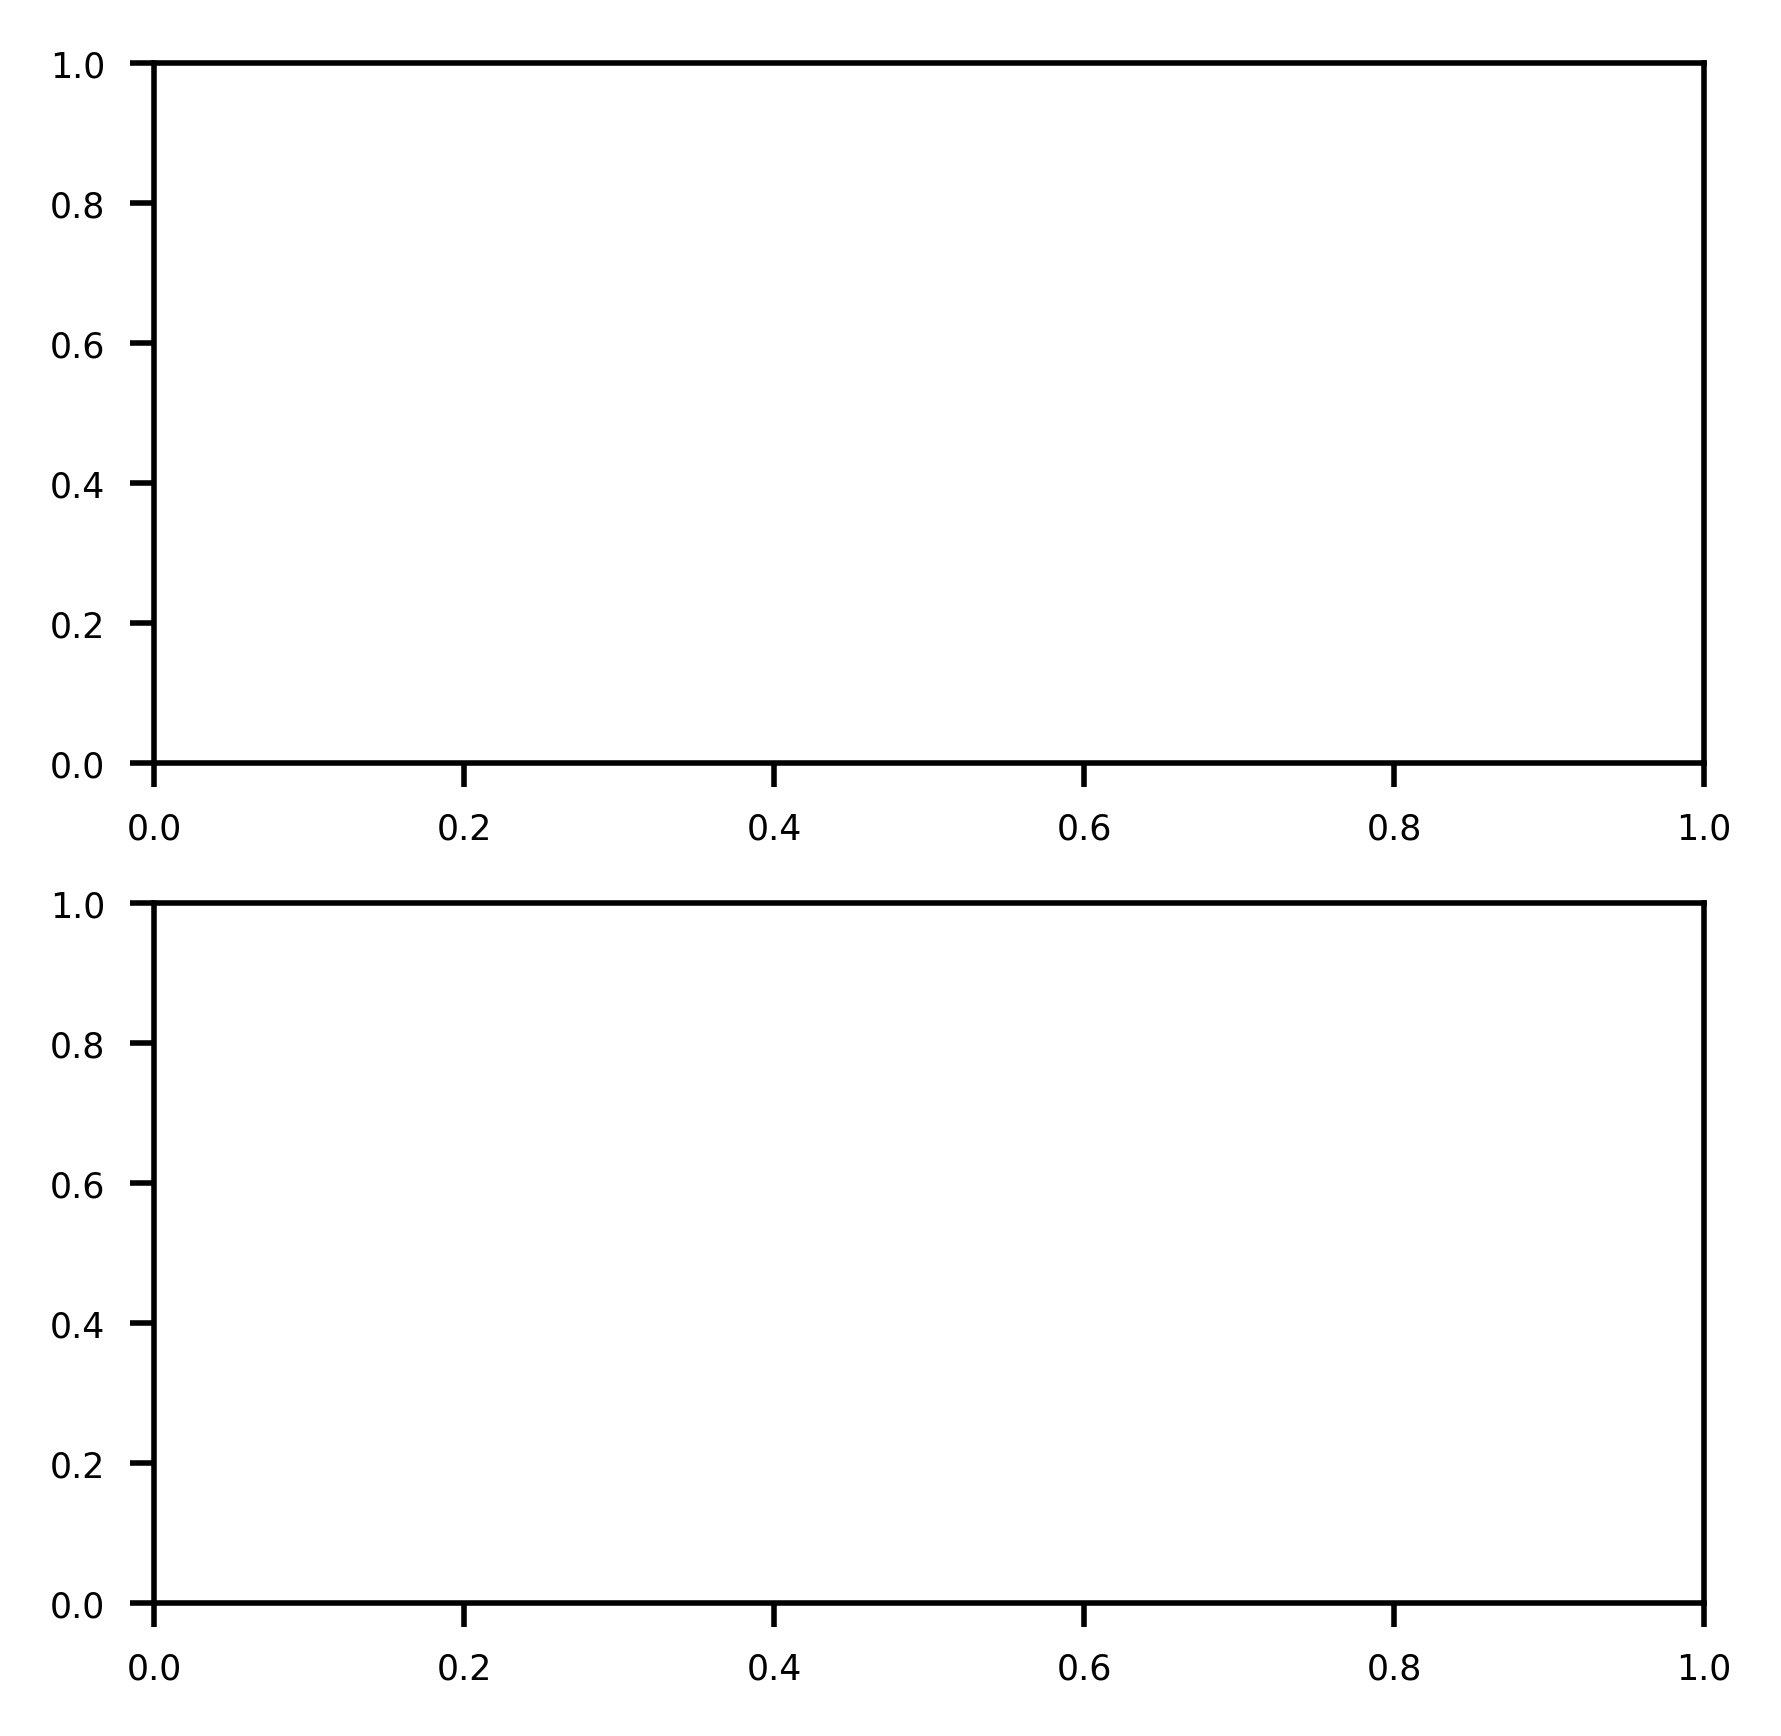

In [120]:
#Comparing through different iterations

import matplotlib.pyplot as plt
from astropy.io import fits
import numpy as np
import warnings
import matplotlib
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

from os.path import join
plt.rcParams.update({
    "font.family": "dejavu sans",   # specify font family here
    "font.serif": ["Times"],  # specify font here
    "font.size":5,
"legend.fancybox":True})
plt.style.available
#plt.style.use(["science"])
cmap = matplotlib.cm.get_cmap('cividis')

datype="n18_logxi_3"
bN=500
ixmax=7
#rpatho=join("/disk/bifrost/yuanze/xillver_res/xillver3.5/tbb1",datype+"_re")
#rpatho=join("/disk/bifrost/yuanze/xillver_res",datype)
rpatho="/disk/bifrost/yuanze/xillver_res/o_comp"
eV=1.602e-12
kb=1.3807e-16

numrow=2
numcol=1

fig=plt.figure(figsize=(2*numrow,4*numcol),dpi=500)
gs = fig.add_gridspec(numrow,numcol)
axs=gs.subplots()
sm = plt.cm.ScalarMappable(cmap=cmap)
colors=matplotlib.cm.cividis(np.arange(ixmax)/ixmax)
for ite in range(ixmax):
    skip=(bN+2)*ite
    depth=np.loadtxt(join(rpatho,"current/temper"),usecols=0,max_rows=200,skiprows=(200+2)*ite)
    tempeV=np.loadtxt(join(rpatho,"current/temper"),usecols=1,max_rows=200,skiprows=(200+2)*ite)
    temp=tempeV*eV/kb
    spec=np.loadtxt(join(rpatho,"current/spectr"),usecols=0,max_rows=bN,skiprows=skip)
    fout=np.loadtxt(join(rpatho,"current/spectr"),usecols=1,max_rows=bN,skiprows=skip)
    #fioniz=np.loadtxt(join(rpatho,"current/spectr"),usecols=5,max_rows=bN,skiprows=skip)
    with warnings.catch_warnings():
        warnings.filterwarnings('ignore', r'will not be counted towards `max_rows=')
    
    axs[0].plot(spec/1e3,fout*spec/1e3,color=colors[ite],lw=0.5,label="iteration {}".format(ite))

    axs[1].plot(depth,temp,color=colors[ite],lw=0.5,label="ite {}".format(ite))
    #fraction1=np.loadtxt(join(rpatho,"current/spectr"))
#axs[0].plot(spec/1e3,fioniz*spec/1e3,"C{}".format(ite),lw=0.5,label="iteration {}".format(ite))



axins0 = inset_axes(axs[0],
                    width="60%",  # width = 50% of parent_bbox width
                    height="5%",  # height : 5%
                    loc='lower left',
                    bbox_to_anchor=(0.2,0.13,1,1),
                    bbox_transform=axs[0].transAxes)
#axins1 = inset_axes(axs[1],
                    #width="60%",  # width = 50% of parent_bbox width
                    #height="5%",  # height : 5%
                    #loc='upper left',
                    #bbox_to_anchor=(0.2,0.0,1,1),
                    #bbox_transform=axs[1].transAxes)

cbar=plt.colorbar(sm, ticks=np.linspace(0,1,3),orientation="horizontal",cax=axins0)
cbar.set_label(label="Iterations", labelpad=-1)
cbar.ax.set_xticklabels(np.linspace(0,ixmax,3,dtype=str))
#plt.colorbar(sm, ticks=np.linspace(0,15,5),format='%d',cax=axins1,orientation="horizontal",label="Iterations")


#axs[0].legend(fontsize=2)
#axs[1].legend(fontsize=2)
axs[0].set_title("Spectrum")
axs[1].set_title("Temperature profile")
axs[1].set_xscale("log")
axs[1].set_yscale("log")
axs[1].set_xlim([1e-4,10])
#axs[1].set_ylim([3e3,5e5])
axs[1].set_xlabel(r"$\tau_{T}$")
axs[1].set_ylabel("K")

axs[0].set_xscale("log")
axs[0].set_yscale("log")
axs[0].set_xlabel("keV")
axs[0].set_ylabel(r"$\epsilon F_{\epsilon}$")
axs[0].set_xlim([1e-2,500])
#axs[0].set_ylim([5e13,1e25])

fig.tight_layout()

In [ ]:
print(temp)

[1.81572376e+08 1.80760180e+08 1.79913174e+08 1.79019758e+08
 1.78091533e+08 1.77116897e+08 1.76107453e+08 1.75051597e+08
 1.73949330e+08 1.72812255e+08 1.71617165e+08 1.70387267e+08
 1.69110958e+08 1.67799841e+08 1.66442312e+08 1.65038372e+08
 1.63599623e+08 1.62126066e+08 1.60617701e+08 1.59074527e+08
 1.55999783e+08 1.54386992e+08 1.52762599e+08 1.51115000e+08
 1.49455798e+08 1.47808199e+08 1.46125791e+08 1.44454987e+08
 1.42784182e+08 1.41113377e+08 1.39454175e+08 1.37818179e+08
 1.36193786e+08 1.34580995e+08 1.32979807e+08 1.31401825e+08
 1.29847049e+08 1.28303875e+08 1.26783907e+08 1.25275541e+08
 1.23778779e+08 1.22305222e+08 1.20866474e+08 1.19416122e+08
 1.17965771e+08 1.16538625e+08 1.15121922e+08 1.13714501e+08
 1.12317523e+08 1.10928667e+08 1.09550253e+08 1.08183442e+08
 1.06824753e+08 1.05475346e+08 1.04136382e+08 1.02806700e+08
 1.01486300e+08 1.00177503e+08 9.88779880e+07 9.76283653e+07
 9.63485754e+07 9.50792279e+07 9.38214833e+07 9.25741812e+07
 9.13373216e+07 9.011206

In [334]:
from astropy.io import fits

srf=fits.open('/disk/bifrost/yuanze/exact_Compton2/table.fits')

srf.info()

Filename: /disk/bifrost/yuanze/exact_Compton2/table.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       7   (0,)      
  1  PARAMETERS    1 BinTableHDU     15   1R x 2C   [  70D,  500D]   
  2  SRF           1 BinTableHDU     17   35000R x 4C   [1D, 1I, 1I, 1PD(172)]   


In [337]:
print(srf[1].columns)
print(srf[1].data.field('TEMP'))
print(len(srf[2].data.field('OUT_IND')))
print(len(srf[2].data.field('OUT_NUM')))
print(srf[2].data.field('SRF')[13][0])

ColDefs(
    name = 'TEMP'; format = '  70D'; unit = 'kT/mec2'
    name = 'ENERGIES'; format = ' 500D'; unit = 'eV'
)
[[1.00000000e+03 1.22167735e+03 1.49249555e+03 1.82334800e+03
  2.22754295e+03 2.72133877e+03 3.32459793e+03 4.06158599e+03
  4.96194760e+03 6.06189899e+03 7.40568469e+03 9.04735724e+03
  1.10529514e+04 1.35031404e+04 1.64964807e+04 2.01533769e+04
  2.46209240e+04 3.00788252e+04 3.67466194e+04 4.48925126e+04
  5.48441658e+04 6.70018750e+04 8.18546731e+04 1.00000000e+05
  1.22167735e+05 1.49249555e+05 1.82334800e+05 2.22754295e+05
  2.72133877e+05 3.32459793e+05 4.06158599e+05 4.96194760e+05
  6.06189899e+05 7.40568469e+05 9.04735724e+05 1.10529514e+06
  1.35031404e+06 1.64964807e+06 2.01533769e+06 2.46209240e+06
  3.00788252e+06 3.67466194e+06 4.48925126e+06 5.48441658e+06
  6.70018750e+06 8.18546731e+06 1.00000000e+07 1.22167735e+07
  1.49249555e+07 1.82334800e+07 2.22754295e+07 2.72133877e+07
  3.32459793e+07 4.06158599e+07 4.96194760e+07 6.06189899e+07
  7.40568469e+

In [336]:
en=np.array(srf[1].data.field("ENERGIES")[0])
print(en)

[1.00000000e-01 1.03348934e-01 1.06810022e-01 1.10387019e-01
 1.14083808e-01 1.17904400e-01 1.21852941e-01 1.25933716e-01
 1.30151153e-01 1.34509829e-01 1.39014475e-01 1.43669979e-01
 1.48481392e-01 1.53453936e-01 1.58593007e-01 1.63904183e-01
 1.69393226e-01 1.75066094e-01 1.80928942e-01 1.86988133e-01
 1.93250243e-01 1.99722067e-01 2.06410627e-01 2.13323183e-01
 2.20467237e-01 2.27850539e-01 2.35481104e-01 2.43367211e-01
 2.51517419e-01 2.59940572e-01 2.68645811e-01 2.77642583e-01
 2.86940650e-01 2.96550104e-01 3.06481372e-01 3.16745232e-01
 3.27352821e-01 3.38315652e-01 3.49645620e-01 3.61355022e-01
 3.73456564e-01 3.85963379e-01 3.98889039e-01 4.12247571e-01
 4.26053471e-01 4.40321721e-01 4.55067806e-01 4.70307728e-01
 4.86058024e-01 5.02335788e-01 5.19158683e-01 5.36544966e-01
 5.54513504e-01 5.73083797e-01 5.92275996e-01 6.12110930e-01
 6.32610122e-01 6.53795819e-01 6.75691012e-01 6.98319459e-01
 7.21705719e-01 7.45875169e-01 7.70854038e-01 7.96669432e-01
 8.23349368e-01 8.509227